# Libraries Import

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import copy
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import time
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix, classification_report

# Data Import

In [2]:
df_raw = pd.read_csv("C:\Prima\Github\Data\loan_data_2007_2014.csv")
pd.set_option('display.max_columns', None)
df_raw.head()

C:\Users\prima\AppData\Local\Temp\ipykernel_27296\736023655.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("C:\Prima\Github\Data\loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dataset Columns Description

| Column Name | Description |
|------------|-------------|
| acc_now_delinq | Number of accounts on which the borrower is currently delinquent |
| addr_state | State provided by the borrower in the loan application |
| annual_inc | Self-reported annual income of the borrower |
| application_type | Indicates whether the loan is individual or joint application |
| collection_recovery_fee | Post charge-off collection fee |
| collections_12_mths_ex_med | Number of collections in the last 12 months excluding medical collections |
| delinq_2yrs | Number of 30+ days delinquency incidents in the past 2 years |
| desc | Loan description provided by the borrower |
| dti | Debt-to-income ratio excluding mortgage and requested loan |
| earliest_cr_line | Month when the borrower's earliest credit line was opened |
| emp_length | Employment length in years (0–10, where 10 means 10+ years) |
| emp_title | Job title provided by the borrower |
| funded_amnt | Total amount funded for the loan |
| funded_amnt_inv | Total amount funded by investors |
| grade | Loan grade assigned by Lending Club |
| home_ownership | Home ownership status (RENT, OWN, MORTGAGE, OTHER) |
| id | Unique loan listing ID |
| initial_list_status | Initial listing status of the loan (W, F) |
| inq_last_6mths | Number of credit inquiries in the past 6 months |
| installment | Monthly payment owed by the borrower |
| int_rate | Interest rate on the loan |
| issue_d | Month when the loan was issued |
| last_credit_pull_d | Most recent month credit was pulled |
| last_pymnt_amnt | Last payment amount received |
| last_pymnt_d | Month when the last payment was received |
| loan_amnt | Loan amount applied for by the borrower |
| loan_status | Current status of the loan (target variable) |
| member_id | Unique borrower ID |
| mths_since_last_delinq | Months since last delinquency |
| mths_since_last_major_derog | Months since most recent major derogatory event (90+ days late) |
| mths_since_last_record | Months since last public record |
| next_pymnt_d | Next scheduled payment date |
| open_acc | Number of open credit accounts |
| out_prncp | Remaining outstanding principal |
| out_prncp_inv | Remaining outstanding principal funded by investors |
| policy_code | Policy code (1 = publicly available, 2 = not publicly available) |
| pub_rec | Number of derogatory public records |
| purpose | Purpose of the loan |
| pymnt_plan | Indicates whether a payment plan is in place |
| recoveries | Post charge-off gross recovery |
| revol_bal | Total revolving credit balance |
| revol_util | Revolving credit utilization rate |
| sub_grade | Loan sub-grade assigned by Lending Club |
| term | Loan term in months (36 or 60) |
| title | Loan title provided by the borrower |
| tot_coll_amt | Total collection amounts ever owed |
| tot_cur_bal | Total current balance of all credit accounts |
| total_acc | Total number of credit accounts |
| total_pymnt | Total payments received to date |
| total_pymnt_inv | Total payments received by investors |
| total_rec_int | Total interest received |
| total_rec_late_fee | Total late fees received |
| total_rec_prncp | Total principal received |
| total_rev_hi_lim | Total revolving credit limit |
| url | URL of the loan listing page |
| verification_status | Income verification status |
| zip_code | First three digits of borrower’s ZIP code |


# Initial EDA

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
df_raw.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


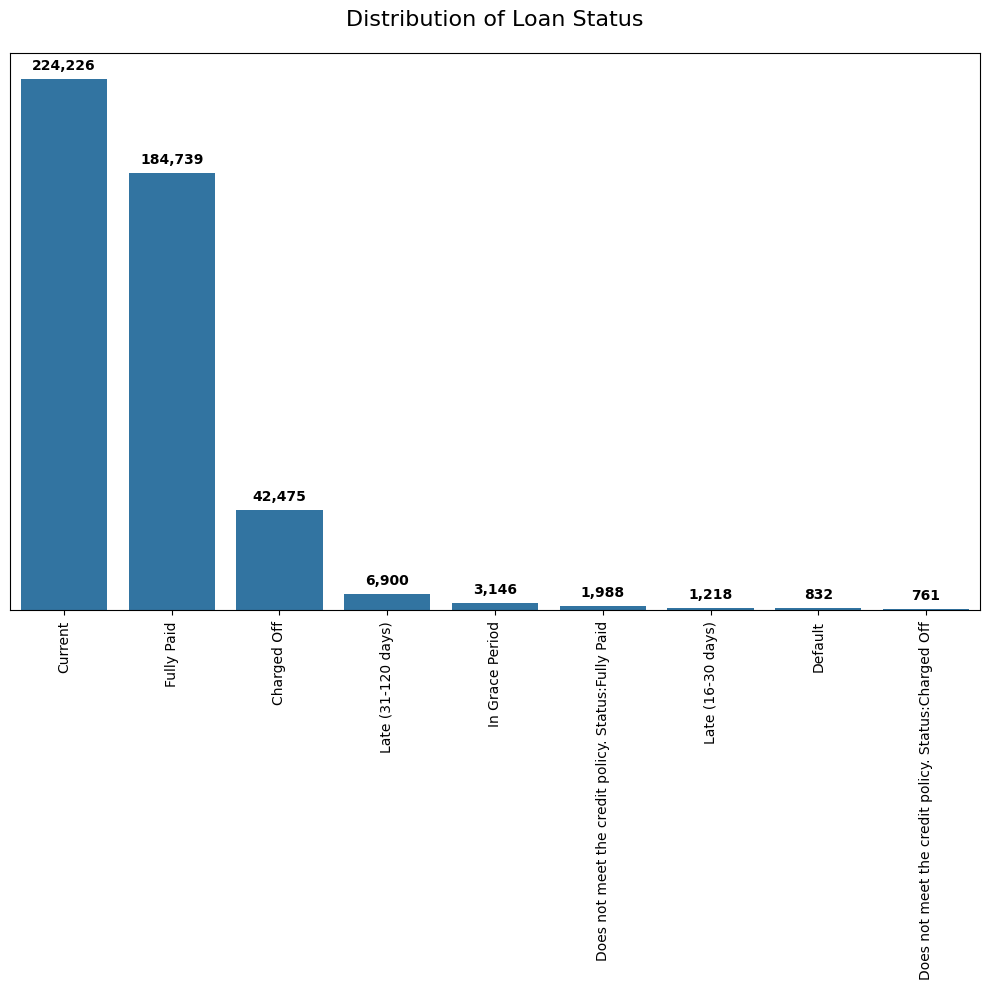

In [5]:
# Create plot from biggest bar to smallest
order = df_raw['loan_status'].value_counts().index

# Create plot
plt.figure(figsize=(10, 10))
ax = sns.countplot(data=df_raw, x='loan_status', order=order)

# Memutar label sumbu x agar vertikal
plt.xticks(rotation=90)

# Menghapus label sumbu x dan y
ax.set(xlabel='', ylabel='')

# Menyembunyikan sumbu y
ax.yaxis.set_visible(False)

# Menambahkan judul
plt.title('Distribution of Loan Status', fontsize=16, pad=20)

# Menambahkan nilai count di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

# Menyesuaikan layout agar tidak terpotong
plt.tight_layout()
plt.show()

# Data Cleaning & Preprocessing

## Feature Selection

In [6]:
df_raw.dropna(axis = 1, how = "all", inplace = True)

In [7]:
drop_cols = [
    # Identifier
    "Unnamed: 0",
    "id",
    "member_id",
    "url",

    # Free text (unstable & noisy)
    "emp_title",
    "desc",
    "title",

    # Post-loan / payment leakage
    "funded_amnt",
    "funded_amnt_inv",
    "out_prncp",
    "out_prncp_inv",
    "total_pymnt",
    "total_pymnt_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "next_pymnt_d",

    # Credit pulled after approval
    "last_credit_pull_d",

    # Redundant or not predictive
    "policy_code",
    "grade",
    "zip_code",
    "initial_list_status",

    # Single value
    "application_type"
]

In [8]:
df_raw.drop(columns = drop_cols, inplace = True)

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   installment                  466285 non-null  float64
 4   sub_grade                    466285 non-null  object 
 5   emp_length                   445277 non-null  object 
 6   home_ownership               466285 non-null  object 
 7   annual_inc                   466281 non-null  float64
 8   verification_status          466285 non-null  object 
 9   issue_d                      466285 non-null  object 
 10  loan_status                  466285 non-null  object 
 11  pymnt_plan                   466285 non-null  object 
 12  purpose                      466285 non-null  object 
 13 

In [10]:
continuous_cols = df_raw.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [11]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features=correlation(df_raw[continuous_cols],0.90)
corr_features

{'installment'}

In [13]:
df_raw.drop(columns=list(corr_features), inplace = True)

In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   sub_grade                    466285 non-null  object 
 4   emp_length                   445277 non-null  object 
 5   home_ownership               466285 non-null  object 
 6   annual_inc                   466281 non-null  float64
 7   verification_status          466285 non-null  object 
 8   issue_d                      466285 non-null  object 
 9   loan_status                  466285 non-null  object 
 10  pymnt_plan                   466285 non-null  object 
 11  purpose                      466285 non-null  object 
 12  addr_state                   466285 non-null  object 
 13 

In [15]:
# Loop through each feature with object data type
for col in df_raw.select_dtypes(include='object').columns.tolist():
    # Shows the distribution of unique values ​​of each feature
    print("Distribution of unique values ​​for features", col)
    print(df_raw[col].value_counts(normalize=True) * 100)
    print('\n')

Distribution of unique values ​​for features term
term
36 months    72.477776
60 months    27.522224
Name: proportion, dtype: float64


Distribution of unique values ​​for features sub_grade
sub_grade
B3    6.795415
B4    6.542136
C1    5.780370
C2    5.734690
B2    5.706810
C3    5.429512
B5    5.415572
C4    5.169585
B1    4.906012
C5    4.756319
A5    4.666030
D1    4.130735
A4    4.084412
D2    3.655704
D3    3.198902
D4    3.023687
A3    2.695347
D5    2.480457
A2    2.349636
A1    2.260635
E1    1.937227
E2    1.859163
E3    1.496081
E4    1.285051
E5    1.090964
F1    0.844977
F2    0.643598
F3    0.580761
F4    0.443291
F5    0.324480
G1    0.237837
G2    0.176501
G3    0.125031
G4    0.090503
G5    0.082568
Name: proportion, dtype: float64


Distribution of unique values ​​for features emp_length
emp_length
10+ years    33.697900
2 years       9.291520
3 years       8.218704
< 1 year      8.144369
5 years       6.911204
1 year        6.652488
4 years       6.293386
7 years    

In [16]:
# Delete fiture 'pymnt_plan' from dataset 
df_raw.drop(columns = 'pymnt_plan', inplace=True)

In [17]:
df_raw.sample(10)

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
312245,8000,36 months,11.67,B4,3 years,MORTGAGE,40000.0,Not Verified,Sep-14,Late (31-120 days),other,NC,7.56,0.0,Sep-01,0.0,73.0,NaN,13.0,0.0,9857,36.5,24.0,0.0,73.0,0.0,1006.0,112132.0,27000.0
11243,10625,36 months,11.99,B5,2 years,MORTGAGE,32400.0,Verified,Jul-11,Fully Paid,small_business,CO,3.67,0.0,Apr-00,0.0,56.0,90.0,5.0,1.0,3939,71.6,15.0,0.0,NaN,0.0,NaN,NaN,NaN
277456,35000,60 months,14.49,C4,10+ years,MORTGAGE,206000.0,Verified,Oct-14,Fully Paid,debt_consolidation,IN,18.27,1.0,May-93,3.0,21.0,NaN,17.0,0.0,27727,70.1,47.0,0.0,NaN,0.0,0.0,641526.0,56500.0
407765,8400,36 months,8.90,A5,10+ years,MORTGAGE,152000.0,Not Verified,Apr-14,Fully Paid,credit_card,AL,6.20,1.0,Jun-90,1.0,3.0,NaN,22.0,0.0,5359,8.7,50.0,0.0,NaN,0.0,54.0,139923.0,61800.0
67166,4000,36 months,12.99,B4,7 years,RENT,36000.0,Not Verified,Nov-13,Fully Paid,credit_card,VA,14.37,0.0,Jan-03,0.0,28.0,NaN,5.0,0.0,3528,55.1,20.0,0.0,NaN,0.0,0.0,24870.0,6400.0
412918,12000,36 months,7.90,A4,< 1 year,MORTGAGE,73000.0,Not Verified,Apr-14,Fully Paid,credit_card,MI,18.38,0.0,Jan-97,2.0,NaN,NaN,49.0,0.0,12647,26.1,63.0,0.0,NaN,0.0,0.0,169606.0,50500.0
203021,4600,36 months,6.62,A2,10+ years,RENT,64800.0,Not Verified,Aug-12,Fully Paid,car,CA,4.76,0.0,May-02,2.0,NaN,NaN,6.0,0.0,0,0.0,10.0,0.0,NaN,0.0,0.0,72754.0,16200.0
124229,16000,60 months,17.27,C5,10+ years,RENT,118000.0,Verified,Jun-13,Current,debt_consolidation,NY,9.84,0.0,Apr-98,1.0,NaN,109.0,12.0,1.0,25356,56.7,16.0,0.0,NaN,0.0,0.0,28091.0,44700.0
437920,15075,36 months,19.47,D5,< 1 year,RENT,37700.0,Verified,Feb-14,Current,debt_consolidation,MA,28.18,0.0,Jun-96,1.0,57.0,45.0,12.0,1.0,15631,62.3,31.0,0.0,57.0,0.0,0.0,57085.0,25100.0
186378,28000,60 months,19.05,D4,10+ years,MORTGAGE,90000.0,Verified,Nov-12,Current,debt_consolidation,TX,23.15,1.0,Nov-93,1.0,6.0,NaN,16.0,0.0,25566,37.2,32.0,0.0,NaN,0.0,0.0,149384.0,68800.0


## Fixing Data Type

In [18]:
def date_parse(val):
    if pd.isna(val):
        return pd.NaT
    
    month_str, year_str = val.split("-")
    year = int(year_str)
    
    # aturan century
    if year >= 30:
        year += 1900
    else:
        year += 2000
    
    return pd.to_datetime(f"{year}-{month_str}-01", format="%Y-%b-%d")


In [19]:
df_raw["earliest_cr_line"] = df_raw["earliest_cr_line"].apply(date_parse)

In [20]:
df_raw["issue_d"] = df_raw["issue_d"].apply(date_parse)

In [21]:
(df_raw["earliest_cr_line"] > df_raw["issue_d"]).sum()

np.int64(0)

In [22]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  purpose                      466285 non-null  object        
 11  addr_state                

In [23]:
for col in df_raw.columns:
    if df_raw[col].dtype == "float64":
        s = df_raw[col]
        is_integer_like = np.all(np.isclose(s.dropna() % 1, 0))
        if is_integer_like:
            df_raw[col] = s.astype("Int64")

In [24]:
int_cols = df_raw.select_dtypes(include='int64').columns
df_raw[int_cols] = df_raw[int_cols].astype('Int64')

In [25]:
df = copy.deepcopy(df_raw)
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,10.65,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,<NA>,<NA>,3,0,13648,83.7,9,0,<NA>,0,<NA>,<NA>,<NA>
1,2500,60 months,15.27,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,<NA>,<NA>,3,0,1687,9.4,4,0,<NA>,0,<NA>,<NA>,<NA>
2,2400,36 months,15.96,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,<NA>,<NA>,2,0,2956,98.5,10,0,<NA>,0,<NA>,<NA>,<NA>
3,10000,36 months,13.49,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,35,<NA>,10,0,5598,21.0,37,0,<NA>,0,<NA>,<NA>,<NA>
4,3000,60 months,12.69,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,1996-01-01,0,38,<NA>,15,0,27783,53.9,38,0,<NA>,0,<NA>,<NA>,<NA>


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  Int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  purpose                      466285 non-null  object        
 11  addr_state                

## Feature Engineering

In [27]:
df["credit_history_months"] = (
    (df["issue_d"] - df["earliest_cr_line"]).dt.days / 30
)

In [28]:
df.loc[df["issue_d"]<df["earliest_cr_line"], ["issue_d", "earliest_cr_line"]].shape[0]

0

In [29]:
df.drop(columns = ["earliest_cr_line"], inplace = True) 
# issue_d also needed to drop for ML training, but we don't drop now as we need for EDA

In [30]:
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_months
0,5000,36 months,10.65,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1,<NA>,<NA>,3,0,13648,83.7,9,0,<NA>,0,<NA>,<NA>,<NA>,327.666667
1,2500,60 months,15.27,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,5,<NA>,<NA>,3,0,1687,9.4,4,0,<NA>,0,<NA>,<NA>,<NA>,154.233333
2,2400,36 months,15.96,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2,<NA>,<NA>,2,0,2956,98.5,10,0,<NA>,0,<NA>,<NA>,<NA>,122.733333
3,10000,36 months,13.49,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1,35,<NA>,10,0,5598,21.0,37,0,<NA>,0,<NA>,<NA>,<NA>,192.733333
4,3000,60 months,12.69,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,0,38,<NA>,15,0,27783,53.9,38,0,<NA>,0,<NA>,<NA>,<NA>,193.766667


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  Int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  purpose                      466285 non-null  object        
 11  addr_state                

In [32]:
# Contoh list region
West = ['CA', 'NV', 'UT', 'CO', 'WY', 'MT', 'ID', 'OR', 'WA', 'AK', 'HI']
Southwest = ['AZ', 'NM', 'TX', 'OK']
Midwest = ['ND', 'MN', 'SD', 'NE', 'KS', 'MO', 'IA', 'WI', 'IL', 'IN', 'OH', 'MI']
Southeast = ['AR', 'LA', 'MS', 'AL', 'GA', 'TN', 'KY', 'NC', 'SC', 'WV', 'DC', 'VA', 'DE', 'FL']
Northeast = ['PA', 'MD', 'NJ', 'NY', 'CT', 'RI', 'MA', 'NH', 'VT', 'ME']

# Fungsi untuk mapping state ke region
def map_state_to_region(state):
    if state in West:
        return 'West'
    elif state in Southwest:
        return 'Southwest'
    elif state in Midwest:
        return 'Midwest'
    elif state in Southeast:
        return 'Southeast'
    elif state in Northeast:
        return 'Northeast'
    else:
        return 'Other'  # jika ada state yang tidak masuk list

# Terapkan mapping ke kolom addr_state
df["region"] = df['addr_state'].apply(map_state_to_region)

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df["years"] = df["issue_d"].dt.year

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  Int64         
 1   term                         466285 non-null  object        
 2   int_rate                     466285 non-null  float64       
 3   sub_grade                    466285 non-null  object        
 4   emp_length                   445277 non-null  object        
 5   home_ownership               466285 non-null  object        
 6   annual_inc                   466281 non-null  float64       
 7   verification_status          466285 non-null  object        
 8   issue_d                      466285 non-null  datetime64[ns]
 9   loan_status                  466285 non-null  object        
 10  purpose                      466285 non-null  object        
 11  addr_state                

## Handling Missing Values

In [36]:
df.isnull().mean().sort_values(ascending=False)

mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
mths_since_last_delinq         0.536906
tot_coll_amt                   0.150715
total_rev_hi_lim               0.150715
tot_cur_bal                    0.150715
emp_length                     0.045054
revol_util                     0.000729
collections_12_mths_ex_med     0.000311
inq_last_6mths                 0.000062
delinq_2yrs                    0.000062
pub_rec                        0.000062
open_acc                       0.000062
total_acc                      0.000062
acc_now_delinq                 0.000062
credit_history_months          0.000062
annual_inc                     0.000009
loan_status                    0.000000
dti                            0.000000
addr_state                     0.000000
verification_status            0.000000
sub_grade                      0.000000
home_ownership                 0.000000
loan_amnt                      0.000000
int_rate                       0.000000


In [37]:
cols = [
    "mths_since_last_record",
    "mths_since_last_major_derog",
    "mths_since_last_delinq"
]

for col in cols:
    df[f"{col}_missing"] = df[col].isna().astype("Int64")
    df[col] = df[col].fillna(0)

In [38]:
cols = ["total_rev_hi_lim", "tot_cur_bal", "tot_coll_amt"]

for col in cols:
    df[f"{col}_missing"] = df[col].isna().astype("Int64")
    df[col] = df[col].fillna(df[col].median())

In [39]:
# 1. Copy kolom
df["emp_length_num"] = df["emp_length"]

# 2. Cleaning text → numerik
df["emp_length_num"] = (
    df["emp_length_num"]
    .str.replace("10+ years", "10", regex=False)
    .str.replace("< 1 year", "0", regex=False)
    .str.replace(" years", "", regex=False)
    .str.replace(" year", "", regex=False)
    .astype(float)
)

# 3. Missing indicator
df["emp_length_missing"] = df["emp_length_num"].isna().astype("Int64")

# 4. Imputasi median
df["emp_length_num"] = df["emp_length_num"].fillna(
    df["emp_length_num"].median()
)

# 5. Drop kolom lama
df = df.drop(columns=["emp_length"])

In [40]:
df["revol_util"] = df["revol_util"].fillna(df["revol_util"].median())
df["annual_inc"] = df["annual_inc"].fillna(df["annual_inc"].median())

In [41]:
cols = [
    "collections_12_mths_ex_med", "delinq_2yrs", "open_acc",
    "pub_rec", "total_acc", "inq_last_6mths",
    "acc_now_delinq", "credit_history_months"
]

df[cols] = df[cols].fillna(0)

## Target Mapping

In [42]:
df_raw["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [43]:
loan_status_mapping = {
    # GOOD
    "Fully Paid": 0,
    "Does not meet the credit policy. Status:Fully Paid": 0,

    # BAD
    "Charged Off": 1,
    "Default": 1,
    "Does not meet the credit policy. Status:Charged Off": 1,
}

In [44]:
df["status_bad"] = df["loan_status"].map(loan_status_mapping)
df = df.dropna(subset=["status_bad"])
df["status_bad"] = df["status_bad"].astype("Int64")
df = df.drop(columns=["loan_status"])
df["status_bad"].value_counts(normalize=True)

status_bad
0    0.80906
1    0.19094
Name: proportion, dtype: Float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            230795 non-null  Int64         
 1   term                                 230795 non-null  object        
 2   int_rate                             230795 non-null  float64       
 3   sub_grade                            230795 non-null  object        
 4   home_ownership                       230795 non-null  object        
 5   annual_inc                           230795 non-null  float64       
 6   verification_status                  230795 non-null  object        
 7   issue_d                              230795 non-null  datetime64[ns]
 8   purpose                              230795 non-null  object        
 9   addr_state                           230795 non-null  object        
 10  d

## Outlier Detection & Handling

### Outlier Detection

In [46]:
def check_outlier_iqr(series, factor=1.5):
    """
    Check apakah suatu kolom memiliki outlier berdasarkan metode IQR.

    Parameters
    ----------
    series : pd.Series
        Kolom numerik
    factor : float
        Faktor IQR (default = 1.5)

    Returns
    -------
    dict
        {
            'has_outlier': bool,
            'n_outliers': int,
            'lower_bound': float,
            'upper_bound': float
        }
    """
    s = series.dropna()

    # Jika kolom kosong atau hanya 1 nilai unik
    if s.empty or s.nunique() <= 1:
        return {
            "has_outlier": False,
            "n_outliers": 0,
            "lower_bound": np.nan,
            "upper_bound": np.nan
        }

    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    n_outliers = ((s < lower_bound) | (s > upper_bound)).sum()

    return {
        "has_outlier": n_outliers > 0,
        "n_outliers": int(n_outliers),
        "lower_bound": float(lower_bound),
        "upper_bound": float(upper_bound)
    }

In [47]:
numeric_cols = df.select_dtypes(include=["Int64", "float64"]).columns
numeric_cols

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'credit_history_months', 'mths_since_last_record_missing',
       'mths_since_last_major_derog_missing', 'mths_since_last_delinq_missing',
       'total_rev_hi_lim_missing', 'tot_cur_bal_missing',
       'tot_coll_amt_missing', 'emp_length_num', 'emp_length_missing',
       'status_bad'],
      dtype='object')

In [48]:
outlier_report = {}

for col in numeric_cols:
    outlier_report[col] = check_outlier_iqr(df[col])

In [49]:
outlier_df = (
    pd.DataFrame(outlier_report)
    .T
    .sort_values("has_outlier", ascending=False)
)

outlier_df


,has_outlier,n_outliers,lower_bound,upper_bound
loan_amnt,True,6944,-9000.0,34200.0
total_acc,True,3263,-8.0,56.0
emp_length_missing,True,8755,0.0,0.0
mths_since_last_major_derog_missing,True,40232,1.0,1.0
mths_since_last_record_missing,True,27646,1.0,1.0
credit_history_months,True,7730,-22.183333,375.283333
total_rev_hi_lim,True,23029,-2700.0,48500.0
tot_cur_bal,True,16261,-132876.5,329151.5
tot_coll_amt,True,18167,0.0,0.0
acc_now_delinq,True,599,0.0,0.0


In [50]:
cols_with_outliers = outlier_df[outlier_df["has_outlier"]].index.tolist()
cols_with_outliers

['loan_amnt',
 'total_acc',
 'emp_length_missing',
 'mths_since_last_major_derog_missing',
 'mths_since_last_record_missing',
 'credit_history_months',
 'total_rev_hi_lim',
 'tot_cur_bal',
 'tot_coll_amt',
 'acc_now_delinq',
 'int_rate',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'revol_util',
 'revol_bal',
 'pub_rec',
 'open_acc',
 'mths_since_last_record',
 'mths_since_last_delinq',
 'inq_last_6mths',
 'delinq_2yrs',
 'dti',
 'annual_inc',
 'status_bad']

In [51]:
cols_without_outliers = outlier_df[~outlier_df["has_outlier"]].index.tolist()
cols_without_outliers

['mths_since_last_delinq_missing',
 'total_rev_hi_lim_missing',
 'tot_cur_bal_missing',
 'tot_coll_amt_missing',
 'emp_length_num']

### Outlier Handling

In [52]:
time_since_cols = [
    "mths_since_last_delinq",
    "mths_since_last_record",
    "mths_since_last_major_derog"
]

In [53]:
CAP_MONTHS = 36

In [54]:
for col in time_since_cols:
    # 1. Tandai outlier dari data asli
    df[f"{col}_outlier"] = (df[col] > CAP_MONTHS).astype("Int64")

    # 2. Baru lakukan capping
    df[col] = df[col].where(
        (df[col] == 0) | (df[col] <= CAP_MONTHS),
        CAP_MONTHS
    )


In [55]:
def handle_outlier_column(
    df: pd.DataFrame,
    col: str,
    lower_q: float = 0.01,
    upper_q: float = 0.99
):
    """
    Automatic outlier handling + indicator creation
    """

    s = df[col]
    non_null = s.dropna()

    # ===== karakteristik dasar =====
    is_integer_like = np.all(np.isclose(non_null, non_null.astype(int)))
    is_non_negative = (non_null >= 0).all()
    skewness = skew(non_null)
    zero_ratio = (non_null == 0).mean()

    # ===== hitung quantile =====
    lower = non_null.quantile(lower_q)
    upper = non_null.quantile(upper_q)

    # ===== outlier indicator =====
    df[f"{col}_outlier"] = (
        (s < lower) | (s > upper)
    ).astype("Int64")

    # ===== RULE ENGINE =====

    # 1️⃣ COUNT FEATURES (delinq, inq, acc, pub_rec)
    if is_integer_like and is_non_negative and non_null.max() < 100:
        df[col] = s.clip(lower=0, upper=upper)
        method = "cap_count"

    # 2️⃣ RATIO / PERCENTAGE
    elif col.endswith(("util", "rate", "ratio")) or non_null.max() <= 150:
        df[col] = s.clip(lower=0, upper=100)
        method = "cap_ratio"

    # 3️⃣ HEAVILY RIGHT-SKEWED FINANCIAL
    elif skewness > 2:
        df[col] = np.log1p(s.clip(lower=0))
        method = "log_transform"

    # 4️⃣ GENERAL CONTINUOUS → ROBUST CAP
    else:
        df[col] = s.clip(lower=lower, upper=upper)
        method = "robust_cap"

    return {
        "column": col,
        "skewness": round(skewness, 2),
        "zero_ratio": round(zero_ratio, 3),
        "method_applied": method,
        "lower_bound": round(lower, 2),
        "upper_bound": round(upper, 2)
    }

In [56]:
outlier_columns = [
    "loan_amnt",
    "annual_inc",
    "revol_bal",
    "tot_cur_bal",
    "total_rev_hi_lim",
    "tot_coll_amt",
    "int_rate",
    "dti",
    "revol_util"
]

In [57]:
summary = []

for col in outlier_columns:
    result = handle_outlier_column(df, col)
    summary.append(result)

outlier_summary = pd.DataFrame(summary)

In [58]:
outlier_summary

,column,skewness,zero_ratio,method_applied,lower_bound,upper_bound
0,loan_amnt,0.85,0.000,robust_cap,1500.00,35000.00
1,annual_inc,31.42,0.000,log_transform,18000.00,235000.00
2,revol_bal,15.24,0.008,log_transform,54.94,80631.22
3,tot_cur_bal,4.23,0.000,log_transform,4018.94,585250.60
4,total_rev_hi_lim,10.69,0.000,log_transform,3500.00,116853.00
5,tot_coll_amt,476.67,0.921,log_transform,0.00,1839.06
6,int_rate,0.33,0.000,cap_ratio,6.03,24.70
7,dti,0.18,0.001,cap_ratio,1.18,33.81
8,revol_util,-0.09,0.008,cap_ratio,0.50,97.70


In [59]:
df.head()

,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_months,region,years,mths_since_last_record_missing,mths_since_last_major_derog_missing,mths_since_last_delinq_missing,total_rev_hi_lim_missing,tot_cur_bal_missing,tot_coll_amt_missing,emp_length_num,emp_length_missing,status_bad,mths_since_last_delinq_outlier,mths_since_last_record_outlier,mths_since_last_major_derog_outlier,loan_amnt_outlier,annual_inc_outlier,revol_bal_outlier,tot_cur_bal_outlier,total_rev_hi_lim_outlier,tot_coll_amt_outlier,int_rate_outlier,dti_outlier,revol_util_outlier
0,5000,36 months,10.65,B2,RENT,10.085851,Verified,2011-12-01,credit_card,AZ,27.65,0,1,0,0,3,0,9.521422,83.7,9,0,0,0,0.0,11.308849,10.03456,327.666667,Southwest,2011,1,1,1,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,60 months,15.27,C4,RENT,10.308986,Source Verified,2011-12-01,car,GA,1.00,0,5,0,0,3,0,7.4313,9.4,4,0,0,0,0.0,11.308849,10.03456,154.233333,Southeast,2011,1,1,1,1,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2400,36 months,15.96,C5,RENT,9.413526,Not Verified,2011-12-01,small_business,IL,8.72,0,2,0,0,2,0,7.991931,98.5,10,0,0,0,0.0,11.308849,10.03456,122.733333,Midwest,2011,1,1,1,1,1,1,10.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,10000,36 months,13.49,C1,RENT,10.803669,Source Verified,2011-12-01,other,CA,20.00,0,1,35,0,10,0,8.630343,21.0,37,0,0,0,0.0,11.308849,10.03456,192.733333,West,2011,1,1,0,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5000,36 months,7.90,A4,RENT,10.491302,Source Verified,2011-12-01,wedding,AZ,11.20,0,3,0,0,9,0,8.982687,28.3,12,0,0,0,0.0,11.308849,10.03456,86.200000,Southwest,2011,1,1,1,1,1,1,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            230795 non-null  Int64         
 1   term                                 230795 non-null  object        
 2   int_rate                             230795 non-null  float64       
 3   sub_grade                            230795 non-null  object        
 4   home_ownership                       230795 non-null  object        
 5   annual_inc                           230795 non-null  float64       
 6   verification_status                  230795 non-null  object        
 7   issue_d                              230795 non-null  datetime64[ns]
 8   purpose                              230795 non-null  object        
 9   addr_state                           230795 non-null  object        
 10  d

# Post-cleaning EDA

## Number of Unique Value Check

In [61]:
# Numerical
print(df.select_dtypes(exclude='object').nunique())

loan_amnt                                1277
int_rate                                  505
annual_inc                              18195
issue_d                                    91
dti                                      3880
delinq_2yrs                                22
inq_last_6mths                             28
mths_since_last_delinq                     37
mths_since_last_record                     37
open_acc                                   57
pub_rec                                    12
revol_bal                               45985
revol_util                               1092
total_acc                                 102
collections_12_mths_ex_med                  7
mths_since_last_major_derog                37
acc_now_delinq                              6
tot_coll_amt                             3571
tot_cur_bal                            120963
total_rev_hi_lim                         9021
credit_history_months                    2376
years                             

In [62]:
# Cagegorical
print(df.select_dtypes(include='object').nunique())

term                    2
sub_grade              35
home_ownership          6
verification_status     3
purpose                14
addr_state             50
region                  5
dtype: int64


## Univariate Analysis

### Numerical Data

In [63]:
continuous_cols = df.select_dtypes(include=["Int64", "float64"]).columns.tolist()

print("Continuous columns:", continuous_cols)
print("Length of continuous columns: ", len(continuous_cols))

Continuous columns: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'credit_history_months', 'mths_since_last_record_missing', 'mths_since_last_major_derog_missing', 'mths_since_last_delinq_missing', 'total_rev_hi_lim_missing', 'tot_cur_bal_missing', 'tot_coll_amt_missing', 'emp_length_num', 'emp_length_missing', 'status_bad', 'mths_since_last_delinq_outlier', 'mths_since_last_record_outlier', 'mths_since_last_major_derog_outlier', 'loan_amnt_outlier', 'annual_inc_outlier', 'revol_bal_outlier', 'tot_cur_bal_outlier', 'total_rev_hi_lim_outlier', 'tot_coll_amt_outlier', 'int_rate_outlier', 'dti_outlier', 'revol_util_outlier']
Length of continuous columns:  41


In [64]:
num_cols = df.select_dtypes(
    include=["int64", "float64", "Int64", "Float64"]
).columns
num_cols_eda = [
    col for col in num_cols
    if not (col.endswith("_missing") or col.endswith("_outlier"))
]
num_cols_eda = [
    col for col in num_cols_eda
    if col != "status_bad"
]
print(len(num_cols_eda))
num_cols_eda

21


['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'credit_history_months',
 'emp_length_num']

In [65]:
# Histogram + Boxplot
hist_box_cols = [
    'loan_amnt',
    'int_rate',
    'annual_inc',
    'dti',
    'revol_bal',
    'revol_util',
    'tot_cur_bal',
    'total_rev_hi_lim',
    'tot_coll_amt',
    'credit_history_months'
]

# Histogram only
hist_only_cols = [
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'total_acc',
    'pub_rec',
    'collections_12_mths_ex_med',
    'acc_now_delinq',
    'emp_length_num'
]

# Boxplot only
box_only_cols = [
    'mths_since_last_delinq',
    'mths_since_last_record',
    'mths_since_last_major_derog'
]

In [66]:
def histplot_visual(data,column,n_row,n_col):
    fig, ax = plt.subplots(n_row,n_col,figsize=(15,15))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)

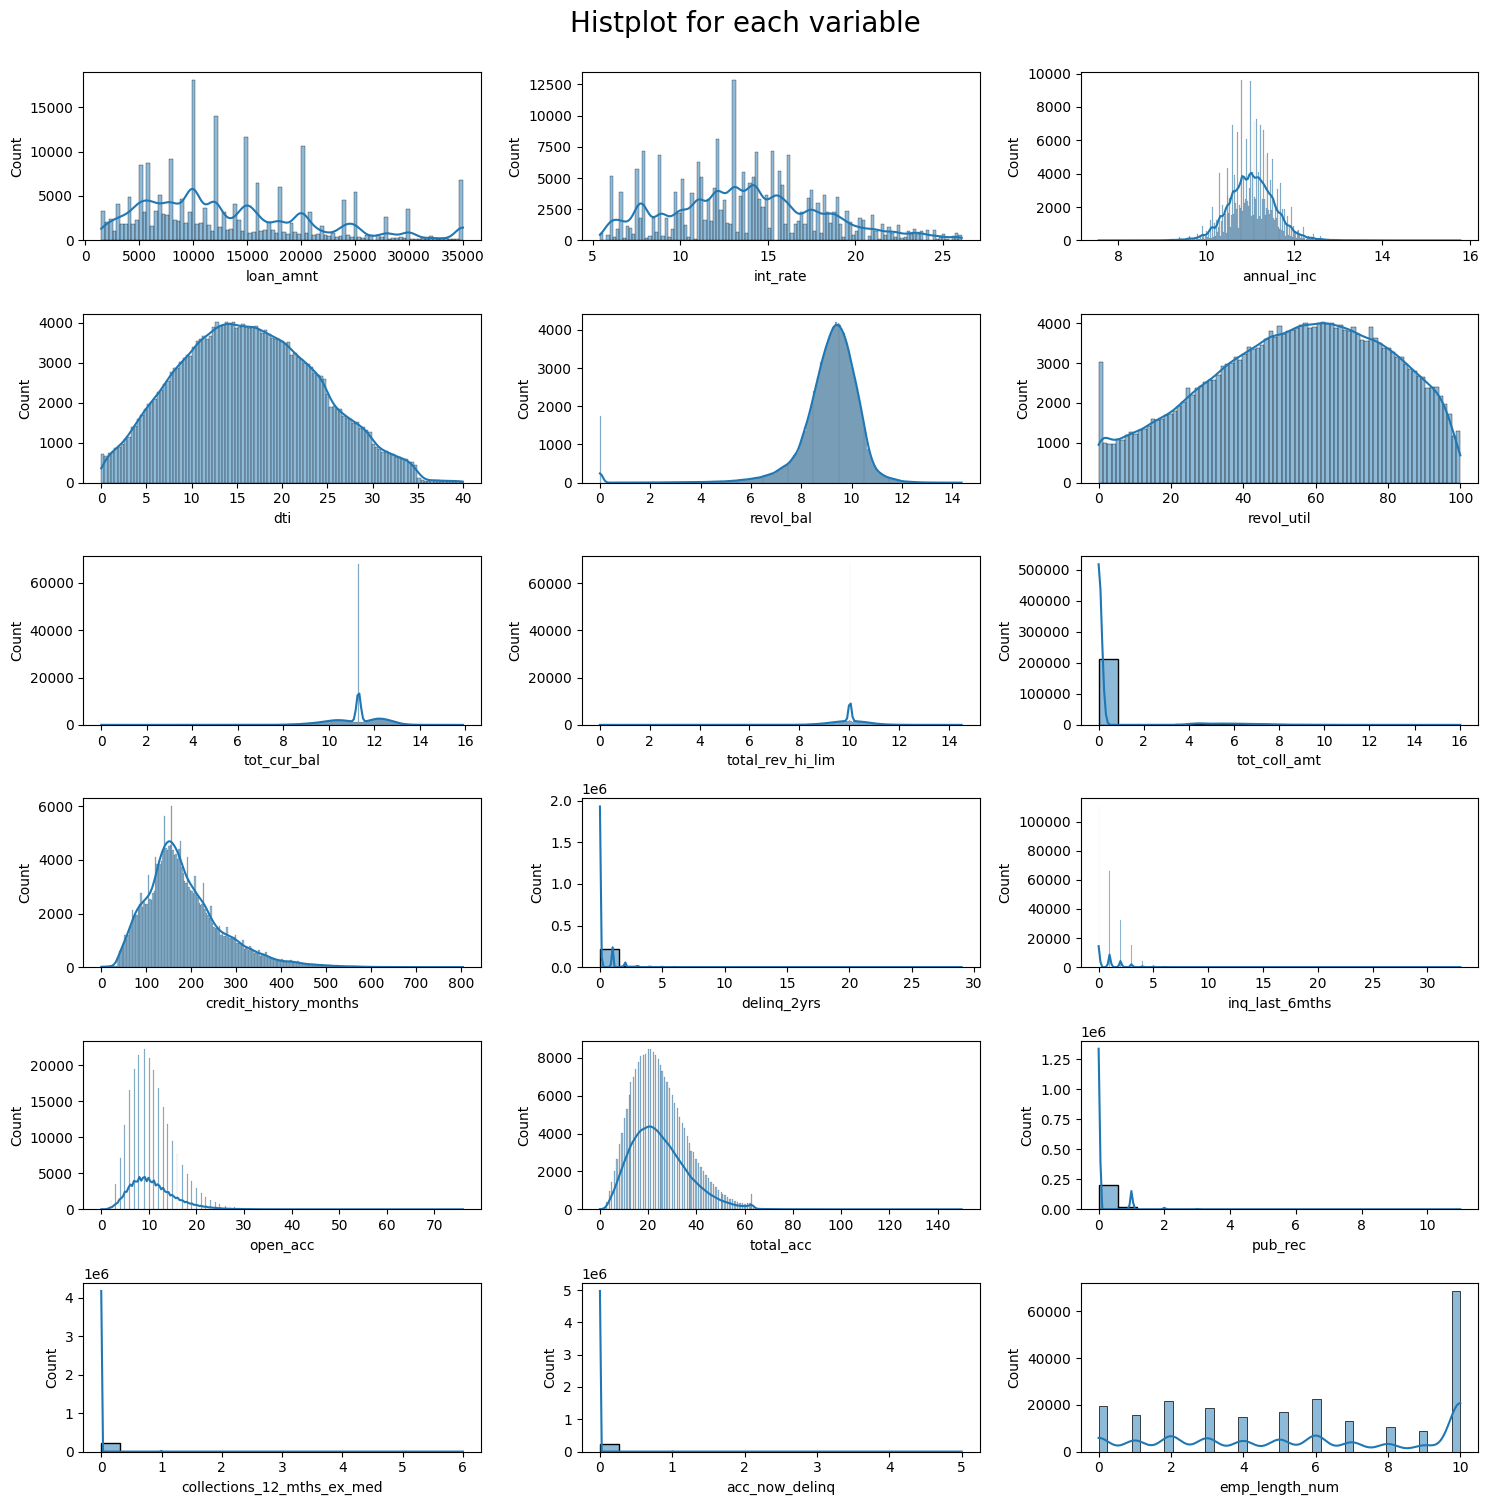

In [67]:
histplot_visual(data=df,column=hist_box_cols+hist_only_cols, n_row = 6, n_col = 3)
plt.tight_layout()

In [68]:
def boxplots_visual(data, columns, n_row, n_col, by=None):
    fig, ax = plt.subplots(n_row, n_col, figsize=(15, 15))
    fig.suptitle('Boxplot for each variable', y=1, size=20)
    ax = ax.flatten()

    for i, feature in enumerate(columns):
        if by is None:
            # Boxplot biasa (tanpa kategori)
            sns.boxplot(
                x=data[feature],
                ax=ax[i],
                orient='h'
            )
        else:
            # Boxplot berdasarkan kategori
            sns.boxplot(
                x=feature,
                y=by,
                data=data,
                ax=ax[i],
                orient='h'
            )

        skewness = round(data[feature].skew(skipna=True), 2)
        ax[i].set_title(f'{feature}, skewness: {skewness}', fontsize=10)

    # Hapus axis kosong jika jumlah kolom < grid
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()

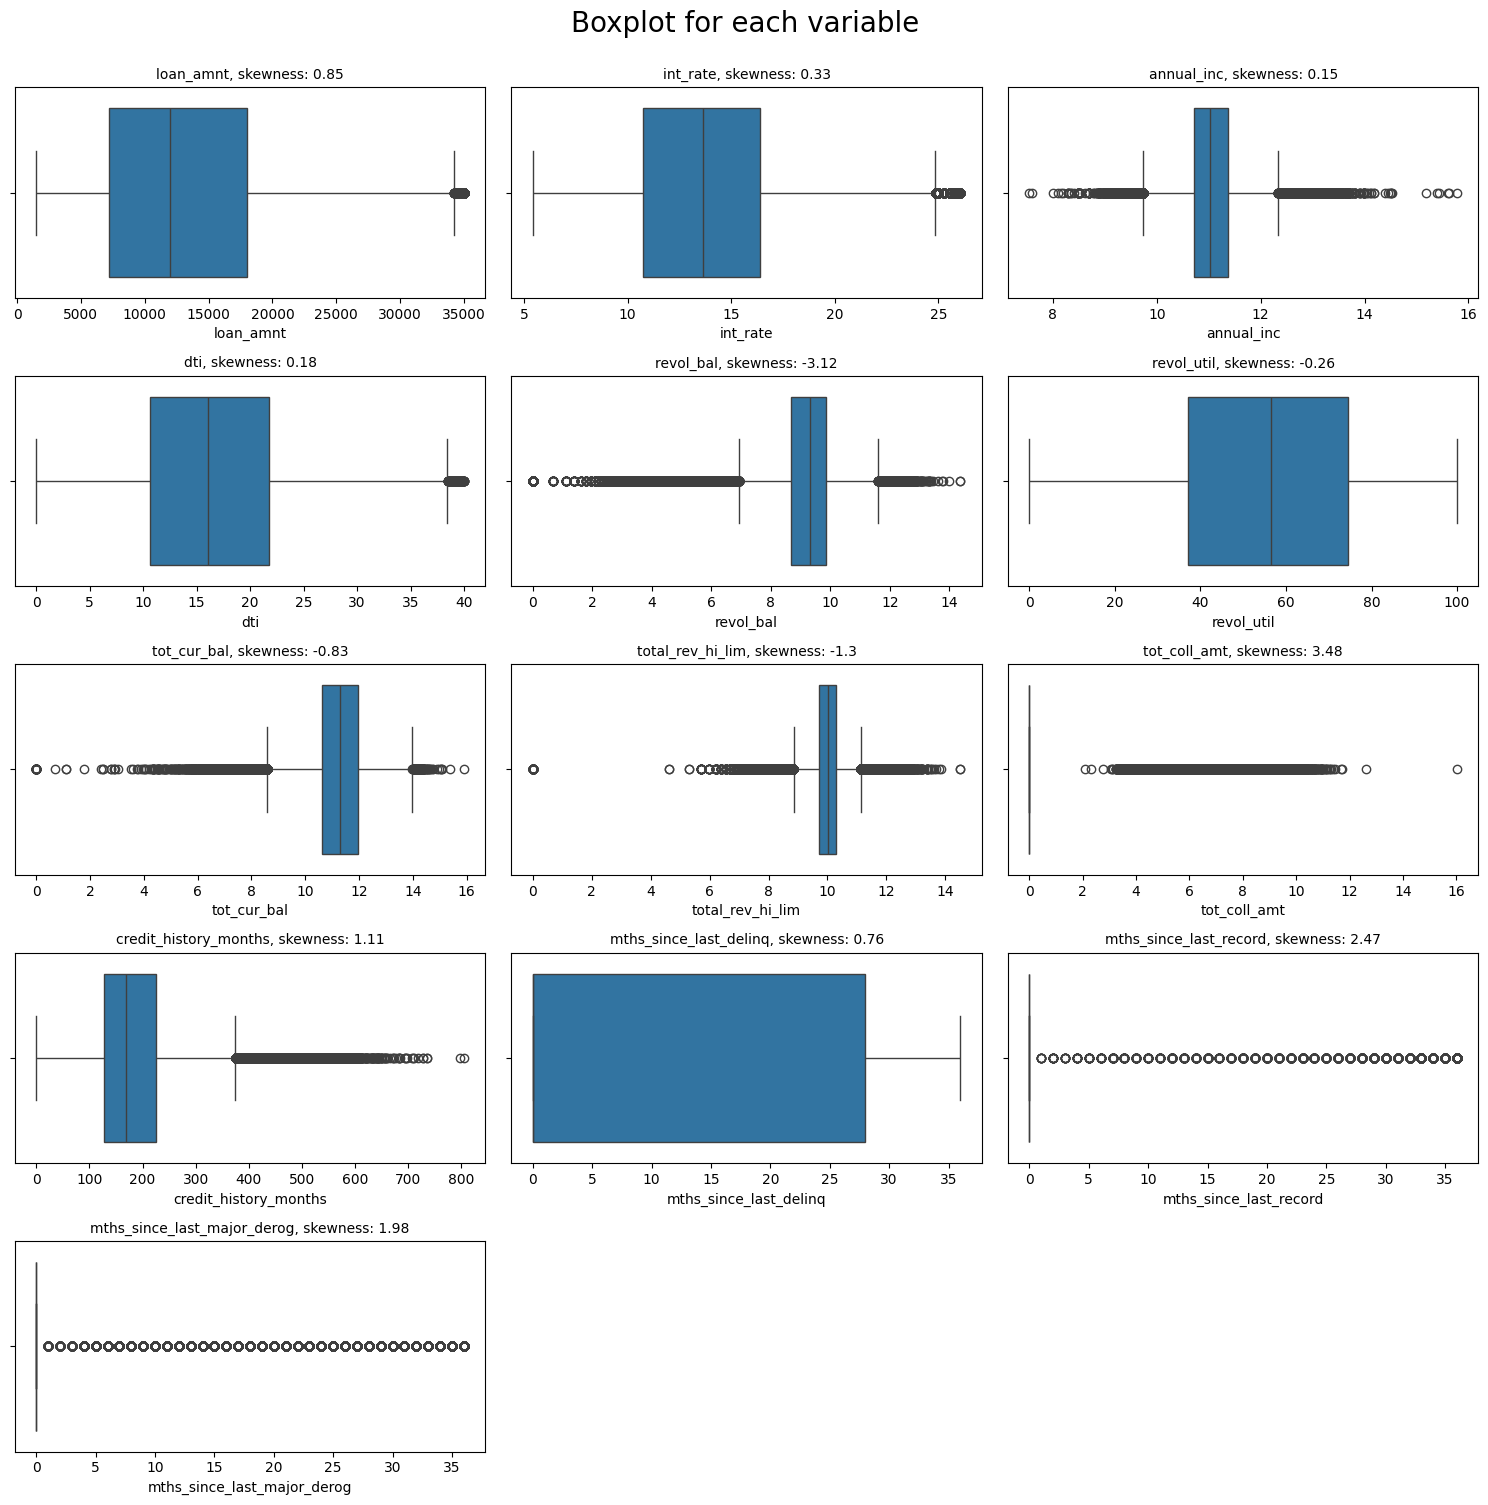

<Figure size 640x480 with 0 Axes>

In [69]:
boxplots_visual(data=df,columns=hist_box_cols+box_only_cols, n_row = 5, n_col = 3)
plt.tight_layout()

### Categorical Data

In [70]:
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Length of categorical columns: ", len(categorical_cols))

Categorical columns: ['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'region']
Length of categorical columns:  7


In [71]:
def categorical_barplot_visual(data, columns, n_row, n_col, by=None):
    fig, ax = plt.subplots(n_row, n_col, figsize=(15, 10))
    fig.suptitle('Barplot for Categorical Variables', y=1, size=20)
    ax = ax.flatten()

    for i, feature in enumerate(columns):

        if by is None:
            # Hitung frekuensi & urutkan dari terbesar ke terkecil
            value_counts = data[feature].value_counts(dropna=False)
            order = value_counts.index

            sns.barplot(
                x=order,
                y=value_counts.values,
                ax=ax[i]
            )

        else:
            # Urutan kategori berdasarkan total count (tanpa melihat by)
            order = (
                data[feature]
                .value_counts(dropna=False)
                .index
            )

            sns.countplot(
                data=data,
                x=feature,
                hue=by,
                order=order,
                ax=ax[i]
            )

        ax[i].set_title(
            f'{feature} (unique: {data[feature].nunique()})',
            fontsize=10
        )
        ax[i].set_xlabel(feature)
        ax[i].set_ylabel('Count')
        ax[i].tick_params(axis='x', rotation=45)

    # Hapus axis kosong jika jumlah kolom < grid
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()

In [72]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

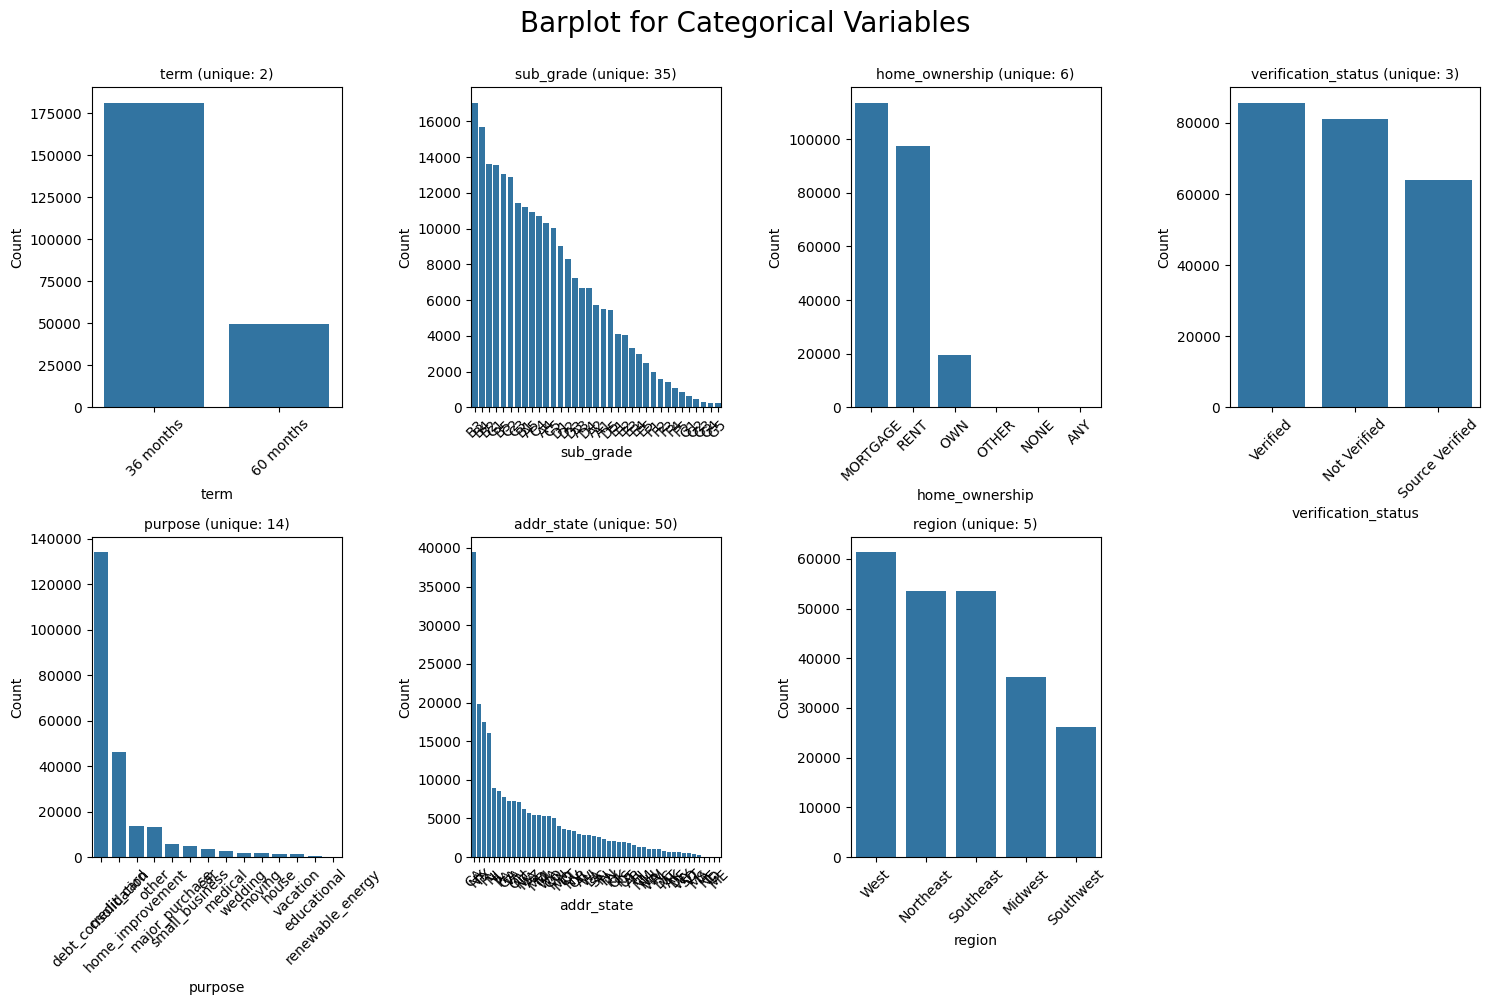

In [73]:
categorical_barplot_visual(
    data=df,
    columns=categorical_cols,
    n_row=2,
    n_col=4
)


## Bivariate Analysis

### Numerical Features vs Target

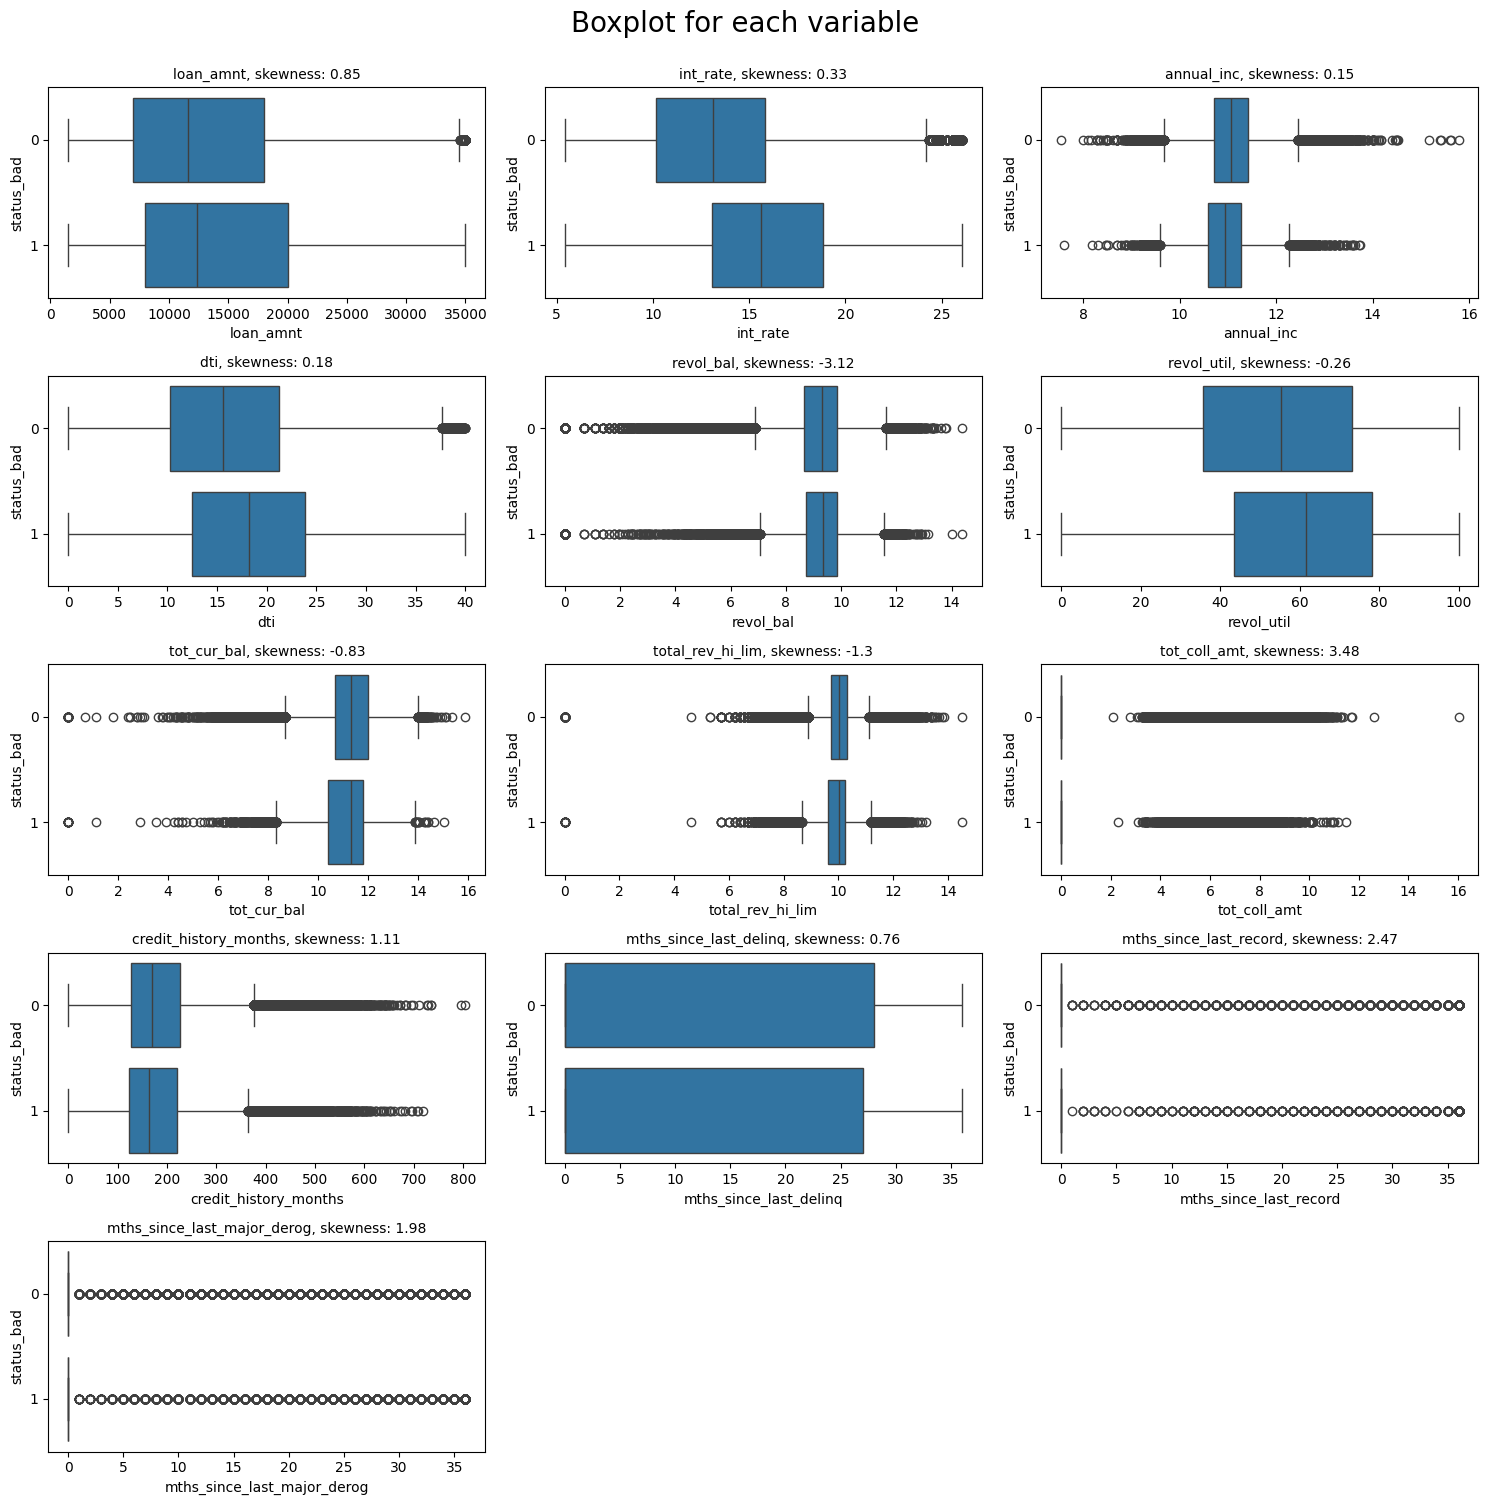

<Figure size 640x480 with 0 Axes>

In [74]:
boxplots_visual(data=df,columns=hist_box_cols+box_only_cols, n_row = 5, n_col = 3, by = "status_bad")
plt.tight_layout()

### Categorical Features vs Target

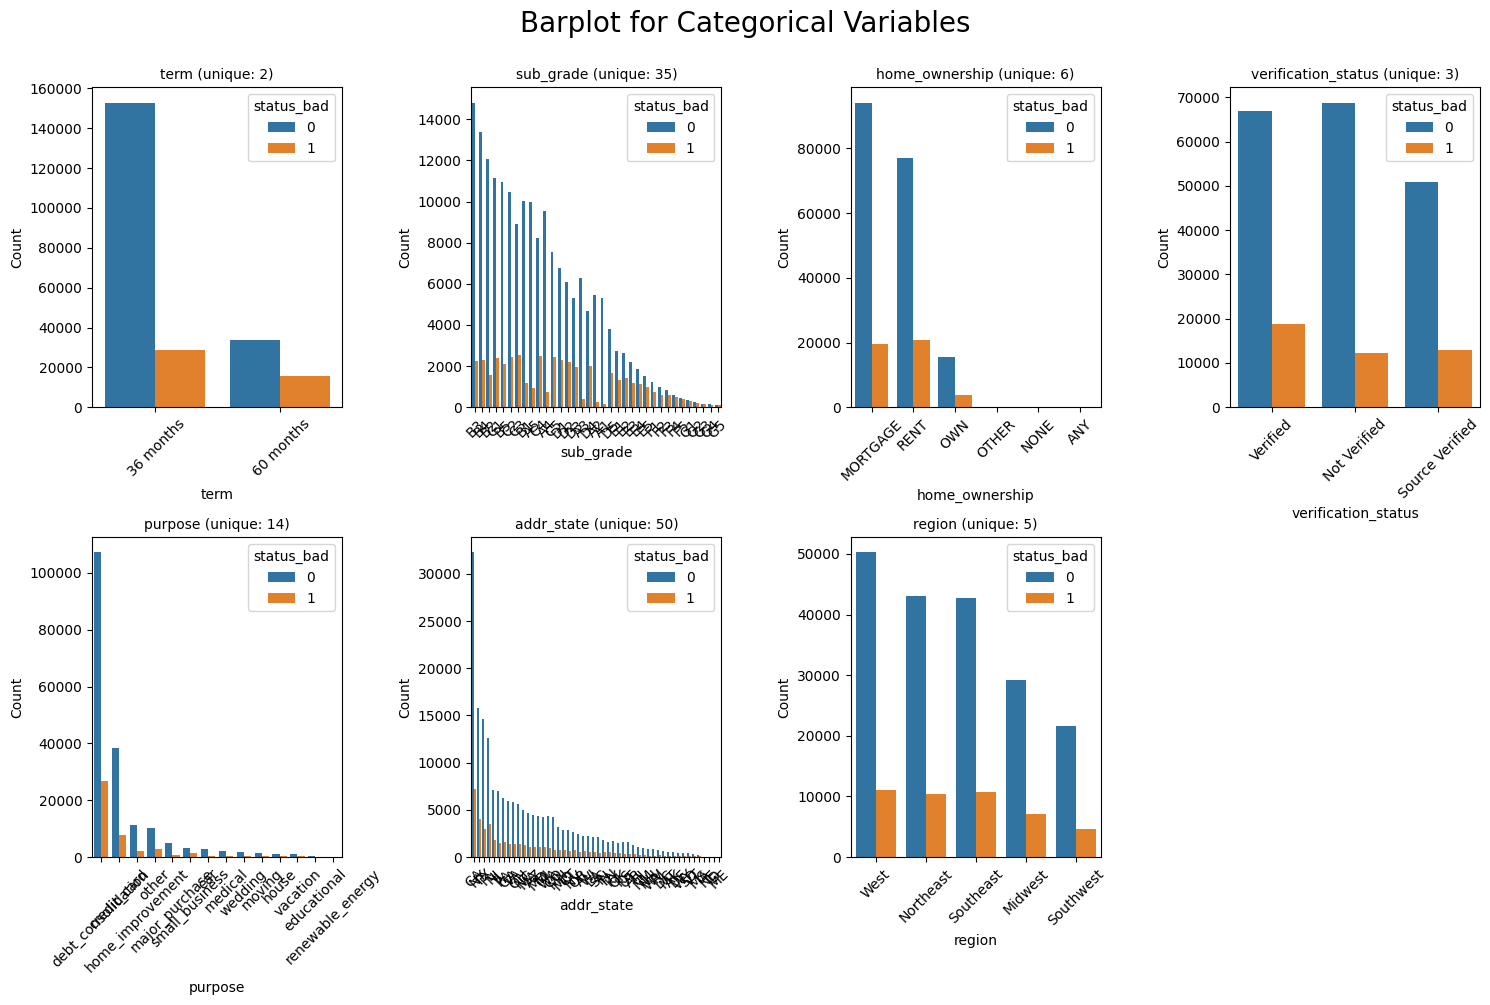

In [75]:
categorical_barplot_visual(
    data=df,
    columns=categorical_cols,
    n_row=2,
    n_col=4, 
    by = "status_bad"
)

## Multivariate Analysis

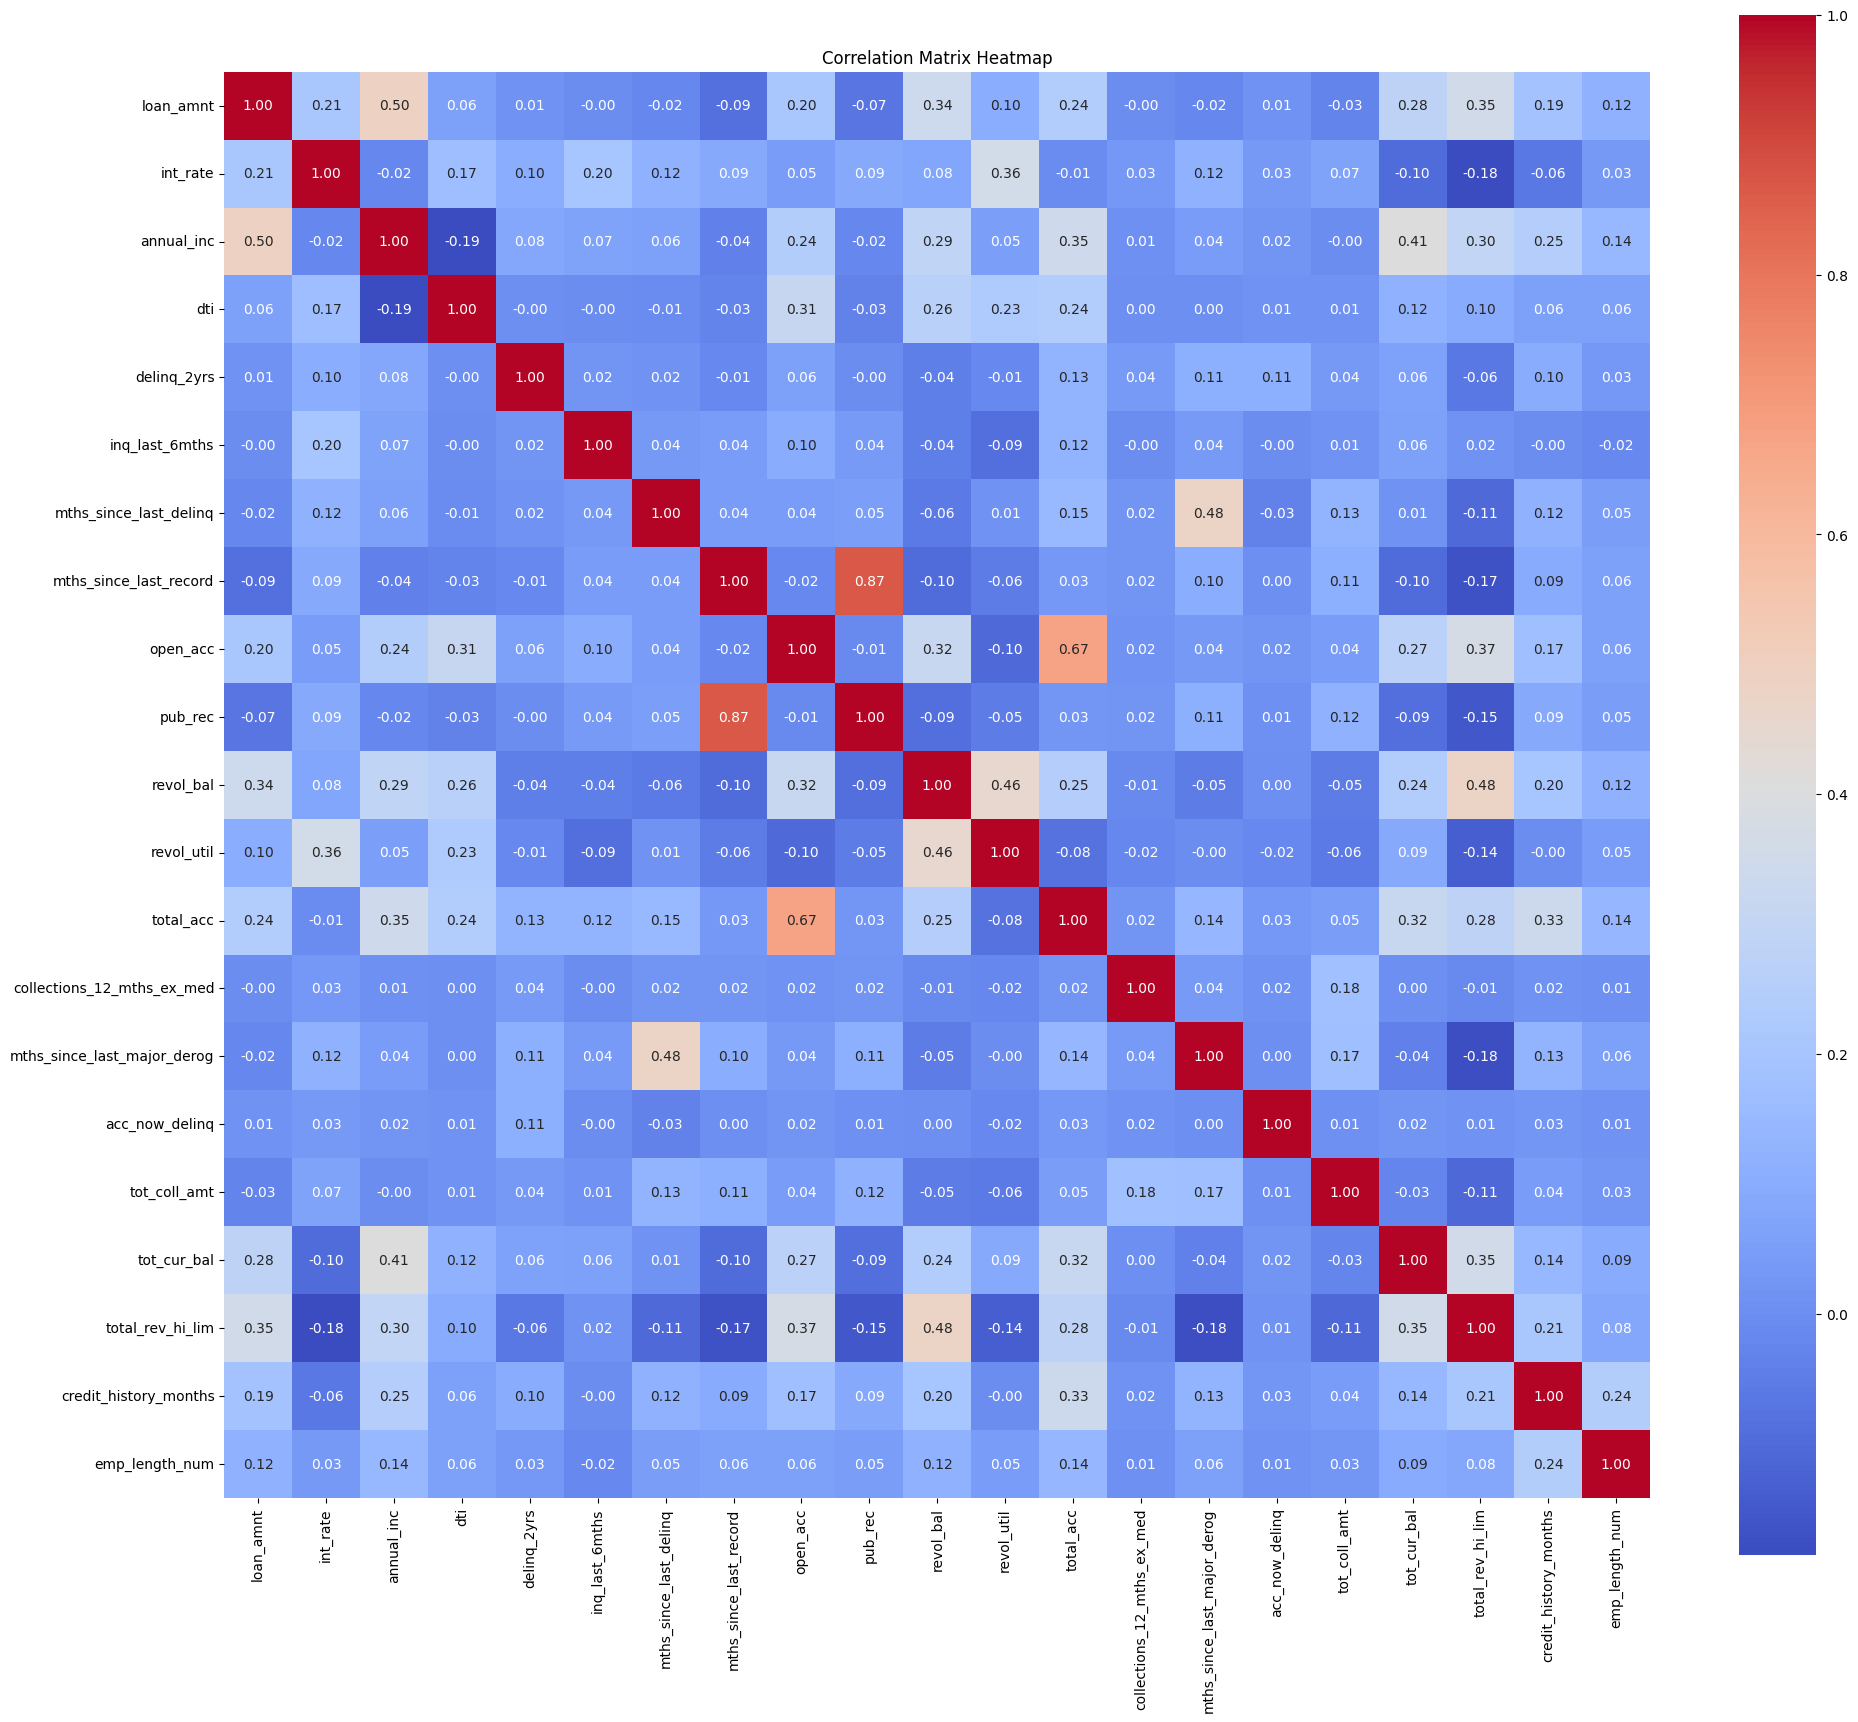

In [76]:
# Compute correlation matrix
corr_matrix = df[num_cols_eda].corr()

# Set plot size
plt.figure(figsize=(23, 20))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Show plot
plt.title("Correlation Matrix Heatmap")
plt.show()

# Insight

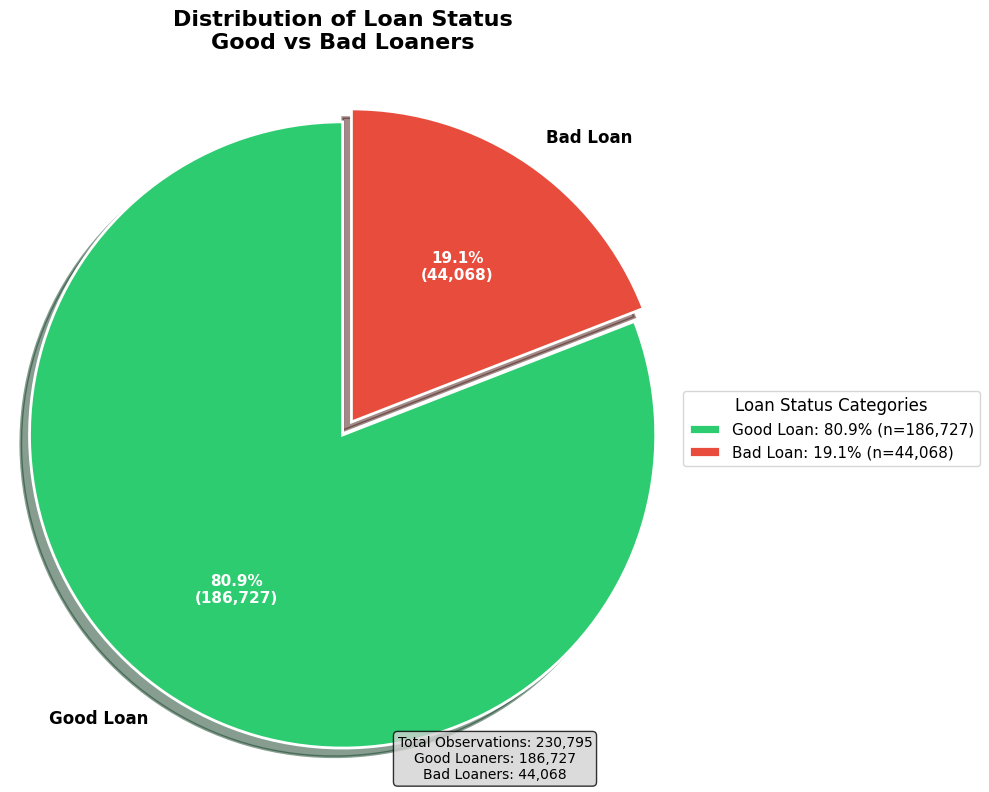

In [77]:
# Hitung proporsi
status_counts = df["status_bad"].value_counts(normalize=True)

# Buat mapping untuk label yang lebih informatif
labels_map = {
    0: "Good Loan",
    1: "Bad Loan"
}

# Warna yang menarik dan sesuai konteks (hijau untuk good, merah untuk bad)
colors = ['#2ECC71', '#E74C3C']  # Hijau untuk good loaner, Merah untuk bad loaner
explode = (0.05, 0)  # Sedikit menonjolkan bagian pertama

# Buat figure dengan ukuran yang sesuai
fig, ax = plt.subplots(figsize=(10, 8))

# Data untuk pie chart
labels = [labels_map[idx] for idx in status_counts.index]
sizes = status_counts.values
percentages = [f'{p:.1%}' for p in sizes]

# Buat pie chart
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    colors=colors,
    autopct='%1.1f%%',
    explode=explode,
    startangle=90,
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Perbaiki autopct untuk lebih informatif
for i, (pct_label, autotext) in enumerate(zip(percentages, autotexts)):
    count = df["status_bad"].value_counts().iloc[i]  # Ambil count sebenarnya
    autotext.set_text(f'{pct_label}\n({count:,})')
    autotext.set_fontsize(11)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Buat legend yang informatif
legend_labels = [f'{label}: {pct} (n={count:,})' 
                 for label, pct, count in zip(labels, percentages, df["status_bad"].value_counts())]

ax.legend(wedges, legend_labels,
          title="Loan Status Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=11,
          title_fontsize=12)

# Tambahkan judul
plt.title('Distribution of Loan Status\nGood vs Bad Loaners', 
          fontsize=16, fontweight='bold', pad=20)

# Pastikan pie chart berbentuk lingkaran
ax.axis('equal')

# Tambahkan ringkasan statistik sebagai teks
summary_text = f'Total Observations: {len(df):,}\n'
summary_text += f'Good Loaners: {df["status_bad"].value_counts().get(0, 0):,}\n'
summary_text += f'Bad Loaners: {df["status_bad"].value_counts().get(1, 0):,}'

plt.figtext(0.5, 0.02, summary_text, 
            ha='center', fontsize=10, 
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

C:\Users\prima\AppData\Local\Temp\ipykernel_27296\3350313162.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=loan_amount_by_status,


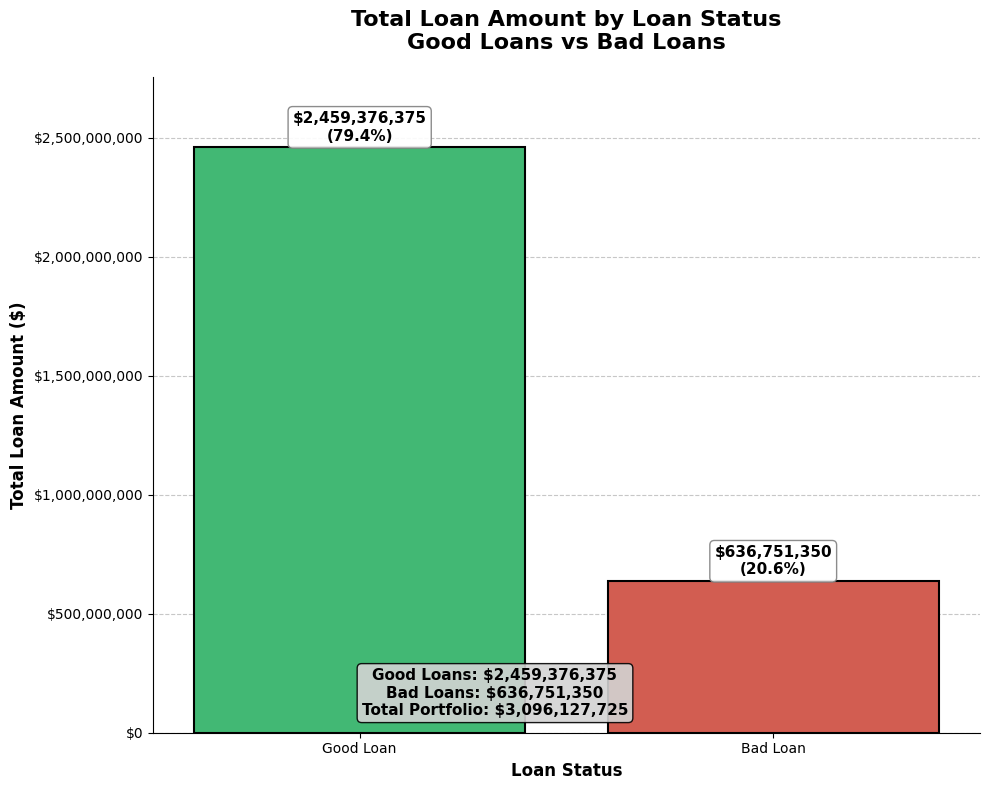

In [78]:
# Mapping untuk label yang lebih informatif
status_labels = {
    0: "Good Loan",
    1: "Bad Loan"
}

# Group data berdasarkan status_bad
loan_amount_by_status = df.groupby('status_bad')['loan_amnt'].sum().reset_index()

# Urutkan dari besar ke kecil
loan_amount_by_status = loan_amount_by_status.sort_values('loan_amnt', ascending=False)

# Buat label untuk sumbu x
loan_amount_by_status['status_label'] = loan_amount_by_status['status_bad'].map(status_labels)

# Warna yang sesuai konteks
colors = ['#2ECC71' if status == 0 else '#E74C3C' 
          for status in loan_amount_by_status['status_bad']]

# Buat plot dengan ukuran yang lebih tinggi
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=loan_amount_by_status, 
                 x='status_label', 
                 y='loan_amnt',
                 palette=colors,
                 edgecolor='black',
                 linewidth=1.5)

# Tambahkan nilai di atas bar
for i, (idx, row) in enumerate(loan_amount_by_status.iterrows()):
    # Tampilkan nilai dengan format dolar
    value_text = f'${row["loan_amnt"]:,.0f}'
    
    # Hitung persentase dari total
    total_loan = loan_amount_by_status['loan_amnt'].sum()
    percentage = (row['loan_amnt'] / total_loan) * 100
    
    # Tampilkan nilai dan persentase di atas bar
    ax.text(i, row['loan_amnt'] + (total_loan * 0.005),  # Posisi lebih rendah
            f'{value_text}\n({percentage:.1f}%)',
            ha='center', va='bottom',
            fontsize=11, fontweight='bold',
            color='black',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray', pad=0.3))

# Atur sumbu y
plt.ylabel('Total Loan Amount ($)', fontsize=12, fontweight='bold')
plt.xlabel('Loan Status', fontsize=12, fontweight='bold')

# Atur limit sumbu y untuk ruang yang cukup untuk teks
max_value = loan_amount_by_status['loan_amnt'].max()
plt.ylim(0, max_value * 1.12)  # Sedikit lebih rendah

# Judul
plt.title('Total Loan Amount by Loan Status\nGood Loans vs Bad Loans', 
          fontsize=16, fontweight='bold', pad=20)

# Hapus spines yang tidak perlu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Grid untuk readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Format sumbu y dengan dolar
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Hitung statistik untuk summary
good_loan_amt = loan_amount_by_status.loc[loan_amount_by_status['status_bad'] == 0, 'loan_amnt']
bad_loan_amt = loan_amount_by_status.loc[loan_amount_by_status['status_bad'] == 1, 'loan_amnt']

# Tambahkan ringkasan statistik DI LUAR plot area (di bawah)
if len(good_loan_amt) > 0 and len(bad_loan_amt) > 0:
    good_val = good_loan_amt.values[0] if len(good_loan_amt) > 0 else 0
    bad_val = bad_loan_amt.values[0] if len(bad_loan_amt) > 0 else 0
    
    summary_text = f"Good Loans: ${good_val:,.0f}\nBad Loans: ${bad_val:,.0f}\nTotal Portfolio: ${total_loan:,.0f}"
    
    # Tambahkan summary box di luar plot area dengan adjust posisi
    plt.figtext(0.5, 0.1, summary_text, 
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.9, 
                         edgecolor='black', linewidth=1))

# Atur layout dengan memberikan lebih banyak ruang di bawah
plt.subplots_adjust(bottom=0.15)  # Tambahkan lebih banyak ruang di bawah

plt.tight_layout()
plt.show()

C:\Users\prima\AppData\Local\Temp\ipykernel_27296\2423793995.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_states_df,


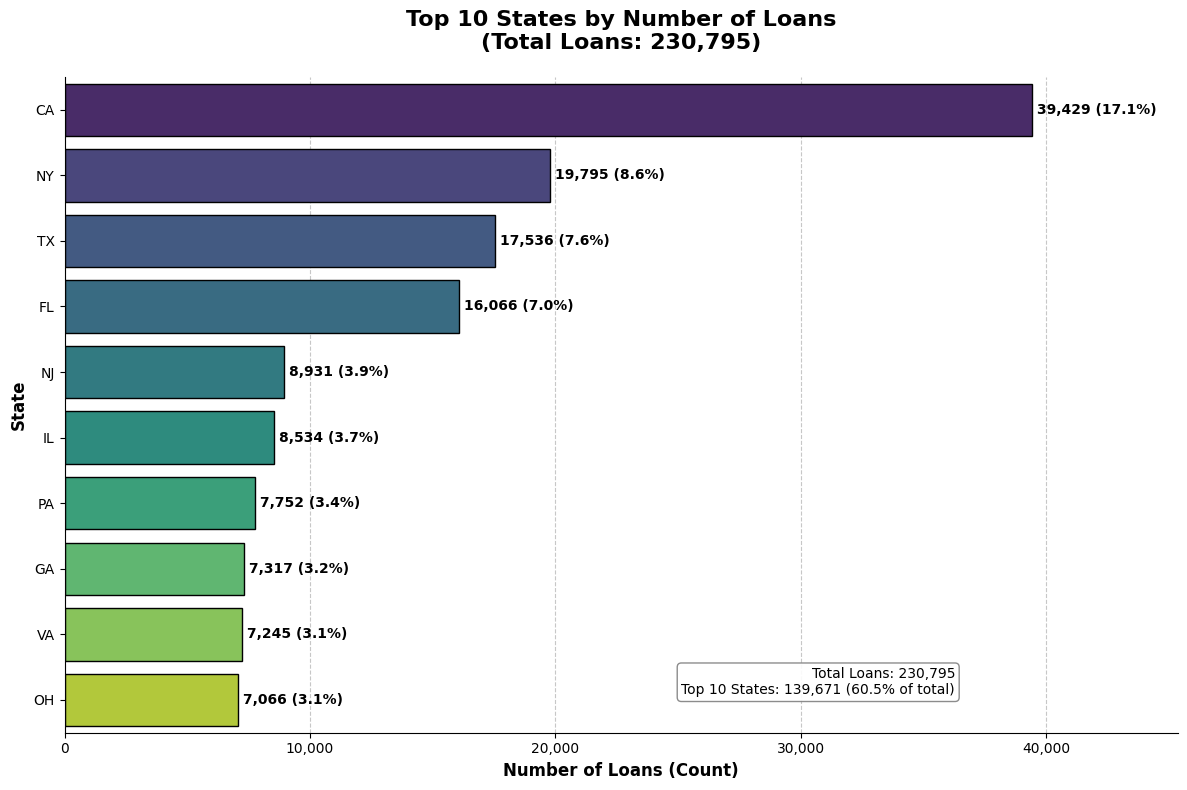

In [79]:
state_counts = df['addr_state'].value_counts()
top_10_states = state_counts.head(10)

# Hitung persentase terhadap total
total_count = len(df)
percentages = (top_10_states.values / total_count * 100)

# Buat DataFrame untuk plotting
top_states_df = top_10_states.reset_index()
top_states_df.columns = ['addr_state', 'count']
top_states_df['percentage'] = percentages

# Buat plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_states_df, 
                 x='count', 
                 y='addr_state',
                 palette='viridis',
                 edgecolor='black',
                 linewidth=1)

# Tambahkan nilai count dan persentase di setiap bar
for i, (count, pct) in enumerate(zip(top_states_df['count'], top_states_df['percentage'])):
    # Format teks: count (persentase%)
    label_text = f'{count:,} ({pct:.1f}%)'
    
    # Posisi teks: sedikit di sebelah kanan bar
    ax.text(count + (max(top_states_df['count']) * 0.005), 
            i, 
            label_text,
            ha='left', 
            va='center',
            fontsize=10,
            fontweight='bold')

# Atur label sumbu
plt.xlabel('Number of Loans (Count)', fontsize=12, fontweight='bold')
plt.ylabel('State', fontsize=12, fontweight='bold')

# Judul dengan informasi total
plt.title(f'Top 10 States by Number of Loans\n(Total Loans: {total_count:,})', 
          fontsize=16, fontweight='bold', pad=20)

# Format sumbu x dengan comma separator
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Grid untuk readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Hapus spines yang tidak perlu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Atur limit sumbu x untuk memberikan ruang untuk label
plt.xlim(0, max(top_states_df['count']) * 1.15)

# Tambahkan informasi total di pojok kanan atas
total_text = f'Total Loans: {total_count:,}\n'
total_text += f'Top 10 States: {top_states_df["count"].sum():,} ({top_states_df["count"].sum()/total_count*100:.1f}% of total)'

ax.text(0.8, 0.1, total_text,
        transform=ax.transAxes,
        ha='right',
        va='top',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray'))

plt.tight_layout()
plt.show()


C:\Users\prima\AppData\Local\Temp\ipykernel_27296\3981281109.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=region_df,


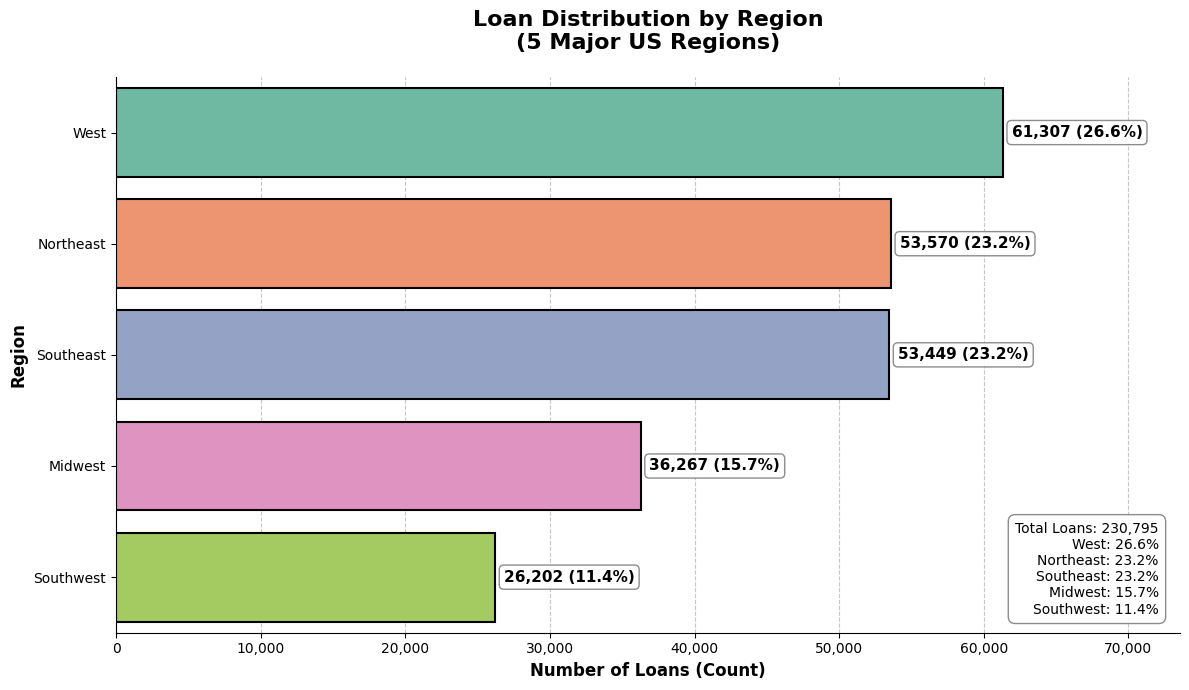

In [80]:
# Hitung count untuk setiap region
region_counts = df['region'].value_counts()
total_count = len(df)

# Hitung persentase
percentages = (region_counts.values / total_count * 100)

# Buat DataFrame untuk plotting
region_df = region_counts.reset_index()
region_df.columns = ['region', 'count']
region_df['percentage'] = percentages

# Urutkan berdasarkan count (terbesar ke terkecil)
region_df = region_df.sort_values('count', ascending=False)

# Buat plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=region_df, 
                 x='count', 
                 y='region',
                 palette='Set2',  # Palette yang baik untuk kategori sedikit
                 edgecolor='black',
                 linewidth=1.5,
                 saturation=0.8)

# Tambahkan nilai count dan persentase di setiap bar
for i, (count, pct) in enumerate(zip(region_df['count'], region_df['percentage'])):
    # Format teks: count (persentase%)
    label_text = f'{count:,} ({pct:.1f}%)'
    
    # Posisi teks: sedikit di sebelah kanan bar
    ax.text(count + (max(region_df['count']) * 0.01), 
            i, 
            label_text,
            ha='left', 
            va='center',
            fontsize=11,
            fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                     edgecolor='gray', pad=0.3))

# Atur label sumbu
plt.xlabel('Number of Loans (Count)', fontsize=12, fontweight='bold')
plt.ylabel('Region', fontsize=12, fontweight='bold')

# Judul dengan informasi total
plt.title('Loan Distribution by Region\n(5 Major US Regions)', 
          fontsize=16, fontweight='bold', pad=20)

# Format sumbu x dengan comma separator
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Grid untuk readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Hapus spines yang tidak perlu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Atur limit sumbu x untuk memberikan ruang untuk label
plt.xlim(0, max(region_df['count']) * 1.2)

# Tambahkan ringkasan statistik di pojok kanan atas
summary_text = f'Total Loans: {total_count:,}\n'
for region, count, pct in zip(region_df['region'], region_df['count'], region_df['percentage']):
    summary_text += f'{region}: {pct:.1f}%\n'

ax.text(0.98, 0.2, summary_text.strip(),
        transform=ax.transAxes,
        ha='right',
        va='top',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                 edgecolor='gray', pad=0.5))

plt.tight_layout()
plt.show()

C:\Users\prima\AppData\Local\Temp\ipykernel_27296\1047003867.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=purpose_df,
C:\Users\prima\AppData\Local\Temp\ipykernel_27296\1047003867.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(formatted_labels, fontsize=11)


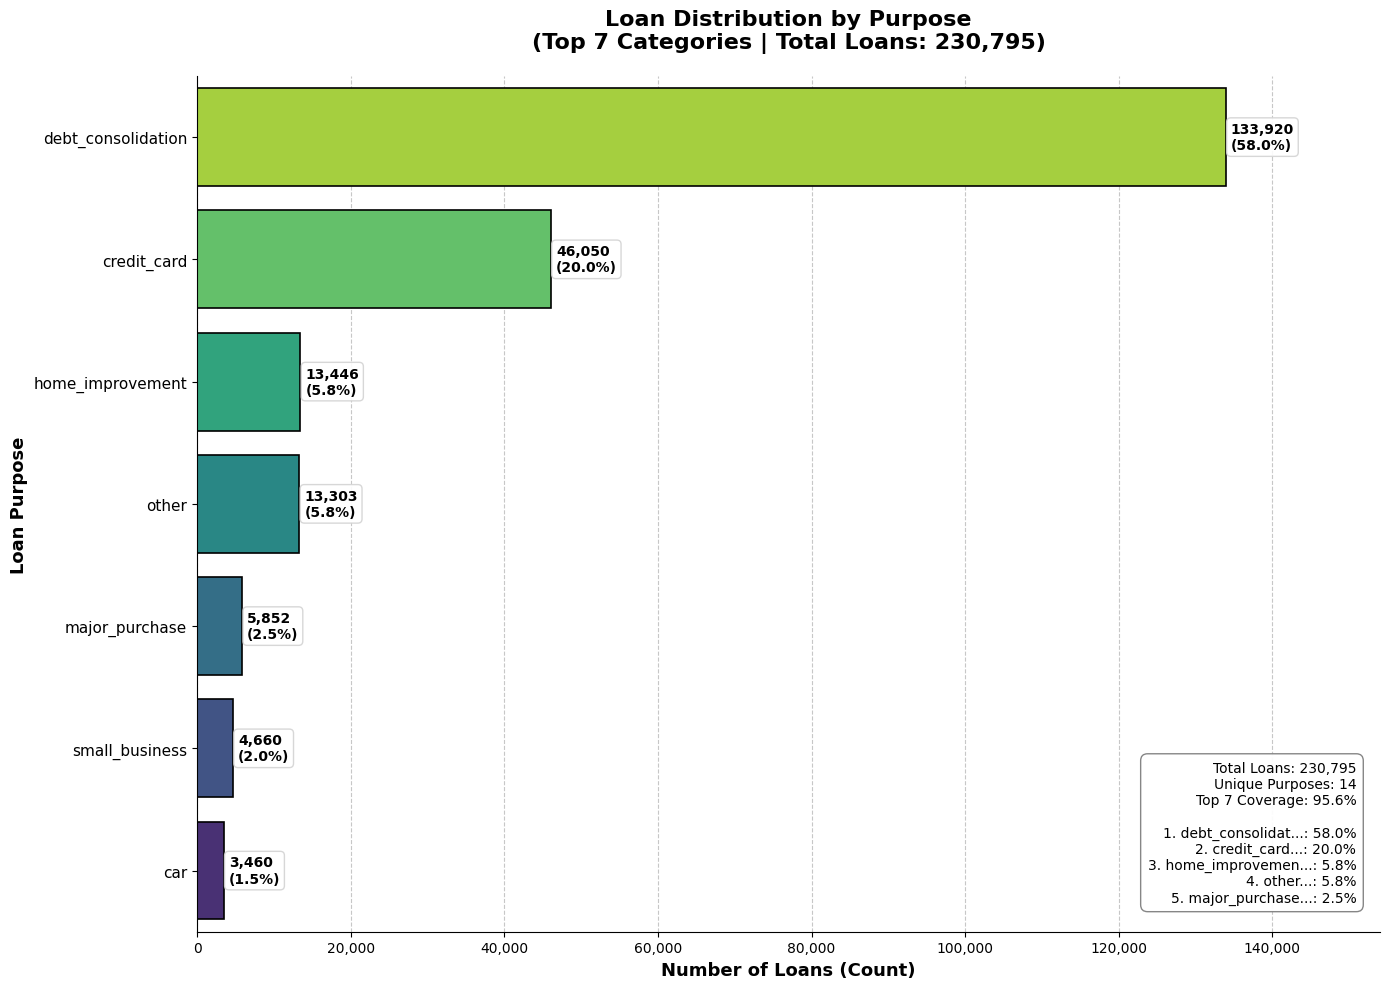

In [81]:
# Hitung count untuk setiap purpose dan ambil semua atau top N
purpose_counts = df['purpose'].value_counts()
total_count = len(df)

# Tampilkan semua purpose atau ambil top tertentu (misal top 12 jika banyak)
n_to_show = min(7, len(purpose_counts))  # Maksimal 15 kategori
top_purposes = purpose_counts.head(n_to_show)

# Hitung persentase
percentages = (top_purposes.values / total_count * 100)

# Buat DataFrame untuk plotting
purpose_df = top_purposes.reset_index()
purpose_df.columns = ['purpose', 'count']
purpose_df['percentage'] = percentages

# Urutkan berdasarkan count (terbesar ke terkecil)
purpose_df = purpose_df.sort_values('count', ascending=False)

# Buat plot dengan ukuran lebih besar untuk readability
plt.figure(figsize=(14, 10))
ax = sns.barplot(data=purpose_df, 
                 x='count', 
                 y='purpose',
                 palette='viridis_r',  # Reverse viridis untuk highlight tertinggi
                 edgecolor='black',
                 linewidth=1.2,
                 saturation=0.85)

# Format label purpose (wrap jika panjang)
def format_purpose_label(purpose, max_length=25):
    """Wrap text jika terlalu panjang"""
    if len(purpose) > max_length:
        return '\n'.join(textwrap.wrap(purpose, max_length))
    return purpose

# Apply formatting
formatted_labels = [format_purpose_label(p) for p in purpose_df['purpose']]
ax.set_yticklabels(formatted_labels, fontsize=11)

# Tambahkan nilai count dan persentase di setiap bar
for i, (count, pct) in enumerate(zip(purpose_df['count'], purpose_df['percentage'])):
    # Format teks: count (persentase%)
    label_text = f'{count:,}\n({pct:.1f}%)'
    
    # Posisi teks: sedikit di sebelah kanan bar
    ax.text(count + (max(purpose_df['count']) * 0.005), 
            i, 
            label_text,
            ha='left', 
            va='center',
            fontsize=10,
            fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                     edgecolor='lightgray', pad=0.3))

# Atur label sumbu
plt.xlabel('Number of Loans (Count)', fontsize=13, fontweight='bold')
plt.ylabel('Loan Purpose', fontsize=13, fontweight='bold')

# Judul dengan informasi total
title_text = f'Loan Distribution by Purpose\n(Top {n_to_show} Categories | Total Loans: {total_count:,})'
plt.title(title_text, fontsize=16, fontweight='bold', pad=20)

# Format sumbu x dengan comma separator
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Grid untuk readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Hapus spines yang tidak perlu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Atur limit sumbu x untuk memberikan ruang untuk label
plt.xlim(0, max(purpose_df['count']) * 1.15)

# Tambahkan ringkasan statistik di pojok kanan atas
summary_text = f'Total Loans: {total_count:,}\n'
summary_text += f'Unique Purposes: {len(purpose_counts)}\n'
summary_text += f'Top {n_to_show} Coverage: {top_purposes.sum()/total_count*100:.1f}%\n\n'

for i, (purpose, count, pct) in enumerate(zip(purpose_df['purpose'], 
                                              purpose_df['count'], 
                                              purpose_df['percentage'])):
    if i < 5:  # Tampilkan top 5 dalam summary
        summary_text += f'{i+1}. {purpose[:15]}...: {pct:.1f}%\n'

ax.text(0.98, 0.2, summary_text.strip(),
        transform=ax.transAxes,
        ha='right',
        va='top',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.95, 
                 edgecolor='gray', pad=0.5))

plt.tight_layout()
plt.show()

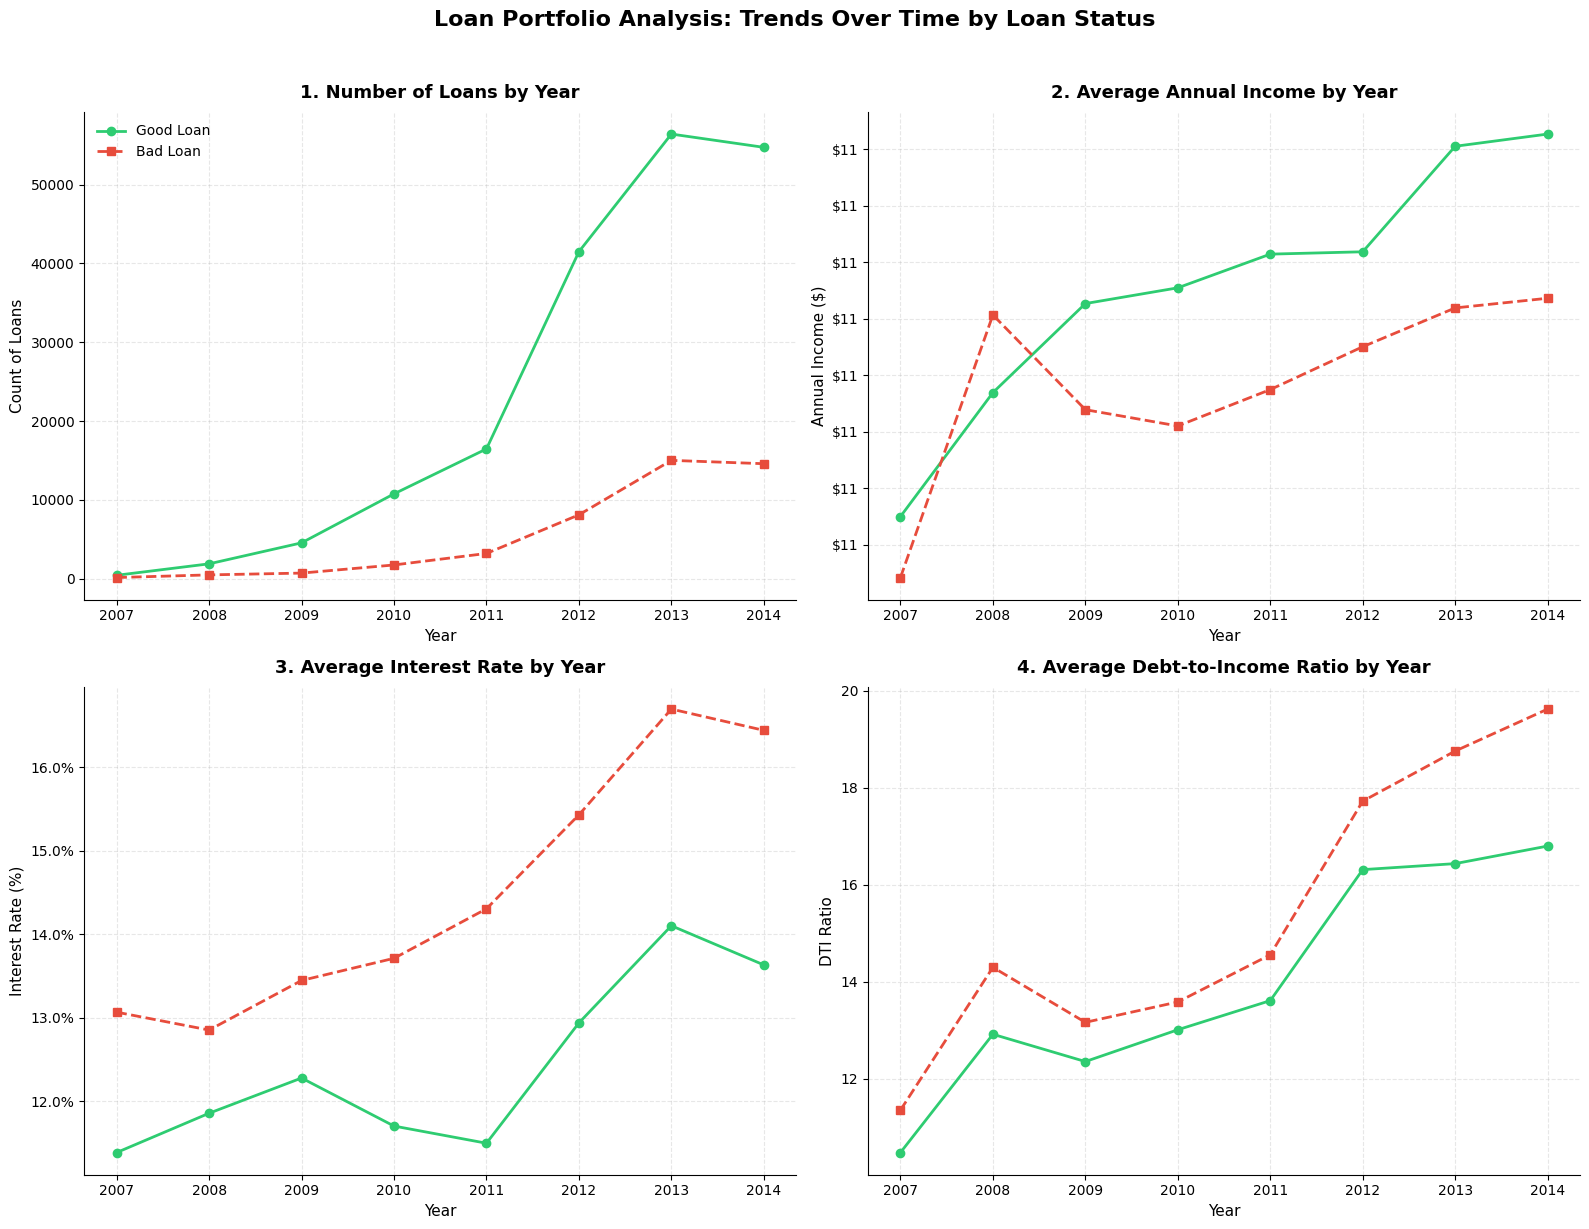

In [82]:
# Fungsi helper untuk styling konsisten
def apply_plot_style(ax, title, ylabel, show_legend=True):
    """Apply consistent styling to plots"""
    ax.set_xlabel('Year', fontsize=11)
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.tick_params(axis='both', labelsize=10)
    
    # Grid yang subtle
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # Clean spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if show_legend:
        ax.legend(fontsize=10, frameon=False)
    else:
        ax.legend().remove()

# Pastikan kolom yang diperlukan ada
required_cols = ['years', 'status_bad', 'annual_inc', 'int_rate', 'dti']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"Kolom yang tidak ditemukan: {missing_cols}")

# Buat figure dengan 4 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Warna dan style konsisten
colors = {'good_loan': '#2ECC71', 'bad_loan': '#E74C3C'}
line_styles = {'good_loan': '-', 'bad_loan': '--'}
markers = {'good_loan': 'o', 'bad_loan': 's'}

# ============================
# CHART 1: NUMBER OF LOANS (Count)
# ============================
ax1 = axes[0]
loan_count_data = df.groupby(['years', 'status_bad']).size().unstack(fill_value=0)

# Rename columns
if 0 in loan_count_data.columns:
    loan_count_data = loan_count_data.rename(columns={0: 'good_loan'})
if 1 in loan_count_data.columns:
    loan_count_data = loan_count_data.rename(columns={1: 'bad_loan'})

# Plot
for status in ['good_loan', 'bad_loan']:
    if status in loan_count_data.columns:
        ax1.plot(loan_count_data.index, 
                loan_count_data[status],
                label=status.replace('_', ' ').title(),
                color=colors[status],
                linestyle=line_styles[status],
                marker=markers[status],
                markersize=6,
                linewidth=2)

apply_plot_style(ax1, '1. Number of Loans by Year', 'Count of Loans')

# ============================
# CHART 2: AVERAGE ANNUAL INCOME
# ============================
ax2 = axes[1]
if 'annual_inc' in df.columns:
    # Hitung rata-rata annual income per tahun per status
    annual_inc_data = df.groupby(['years', 'status_bad'])['annual_inc'].mean().unstack(fill_value=0)
    
    # Rename columns
    if 0 in annual_inc_data.columns:
        annual_inc_data = annual_inc_data.rename(columns={0: 'good_loan'})
    if 1 in annual_inc_data.columns:
        annual_inc_data = annual_inc_data.rename(columns={1: 'bad_loan'})
    
    # Plot
    for status in ['good_loan', 'bad_loan']:
        if status in annual_inc_data.columns:
            ax2.plot(annual_inc_data.index, 
                    annual_inc_data[status],
                    label=status.replace('_', ' ').title(),
                    color=colors[status],
                    linestyle=line_styles[status],
                    marker=markers[status],
                    markersize=6,
                    linewidth=2)
    
    apply_plot_style(ax2, '2. Average Annual Income by Year', 'Annual Income ($)', show_legend=False)
    
    # Format sebagai dolar
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
else:
    ax2.text(0.5, 0.5, 'annual_inc column\nnot available', 
             ha='center', va='center', transform=ax2.transAxes, fontsize=12)
    ax2.set_title('2. Average Annual Income by Year', fontsize=13, fontweight='bold', pad=10)

# ============================
# CHART 3: AVERAGE INTEREST RATE
# ============================
ax3 = axes[2]
if 'int_rate' in df.columns:
    # Hitung rata-rata interest rate per tahun per status
    int_rate_data = df.groupby(['years', 'status_bad'])['int_rate'].mean().unstack(fill_value=0)
    
    # Rename columns
    if 0 in int_rate_data.columns:
        int_rate_data = int_rate_data.rename(columns={0: 'good_loan'})
    if 1 in int_rate_data.columns:
        int_rate_data = int_rate_data.rename(columns={1: 'bad_loan'})
    
    # Plot
    for status in ['good_loan', 'bad_loan']:
        if status in int_rate_data.columns:
            ax3.plot(int_rate_data.index, 
                    int_rate_data[status],
                    label=status.replace('_', ' ').title(),
                    color=colors[status],
                    linestyle=line_styles[status],
                    marker=markers[status],
                    markersize=6,
                    linewidth=2)
    
    apply_plot_style(ax3, '3. Average Interest Rate by Year', 'Interest Rate (%)', show_legend=False)
    
    # Format sebagai persentase
    ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))
else:
    ax3.text(0.5, 0.5, 'int_rate column\nnot available', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('3. Average Interest Rate by Year', fontsize=13, fontweight='bold', pad=10)

# ============================
# CHART 4: AVERAGE DEBT-TO-INCOME RATIO
# ============================
ax4 = axes[3]
if 'dti' in df.columns:
    # Hitung rata-rata DTI per tahun per status
    dti_data = df.groupby(['years', 'status_bad'])['dti'].mean().unstack(fill_value=0)
    
    # Rename columns
    if 0 in dti_data.columns:
        dti_data = dti_data.rename(columns={0: 'good_loan'})
    if 1 in dti_data.columns:
        dti_data = dti_data.rename(columns={1: 'bad_loan'})
    
    # Plot
    for status in ['good_loan', 'bad_loan']:
        if status in dti_data.columns:
            ax4.plot(dti_data.index, 
                    dti_data[status],
                    label=status.replace('_', ' ').title(),
                    color=colors[status],
                    linestyle=line_styles[status],
                    marker=markers[status],
                    markersize=6,
                    linewidth=2)
    
    apply_plot_style(ax4, '4. Average Debt-to-Income Ratio by Year', 'DTI Ratio', show_legend=False)
else:
    ax4.text(0.5, 0.5, 'dti column\nnot available', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('4. Average Debt-to-Income Ratio by Year', fontsize=13, fontweight='bold', pad=10)

# Tambahkan title utama untuk seluruh figure
plt.suptitle('Loan Portfolio Analysis: Trends Over Time by Loan Status', 
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

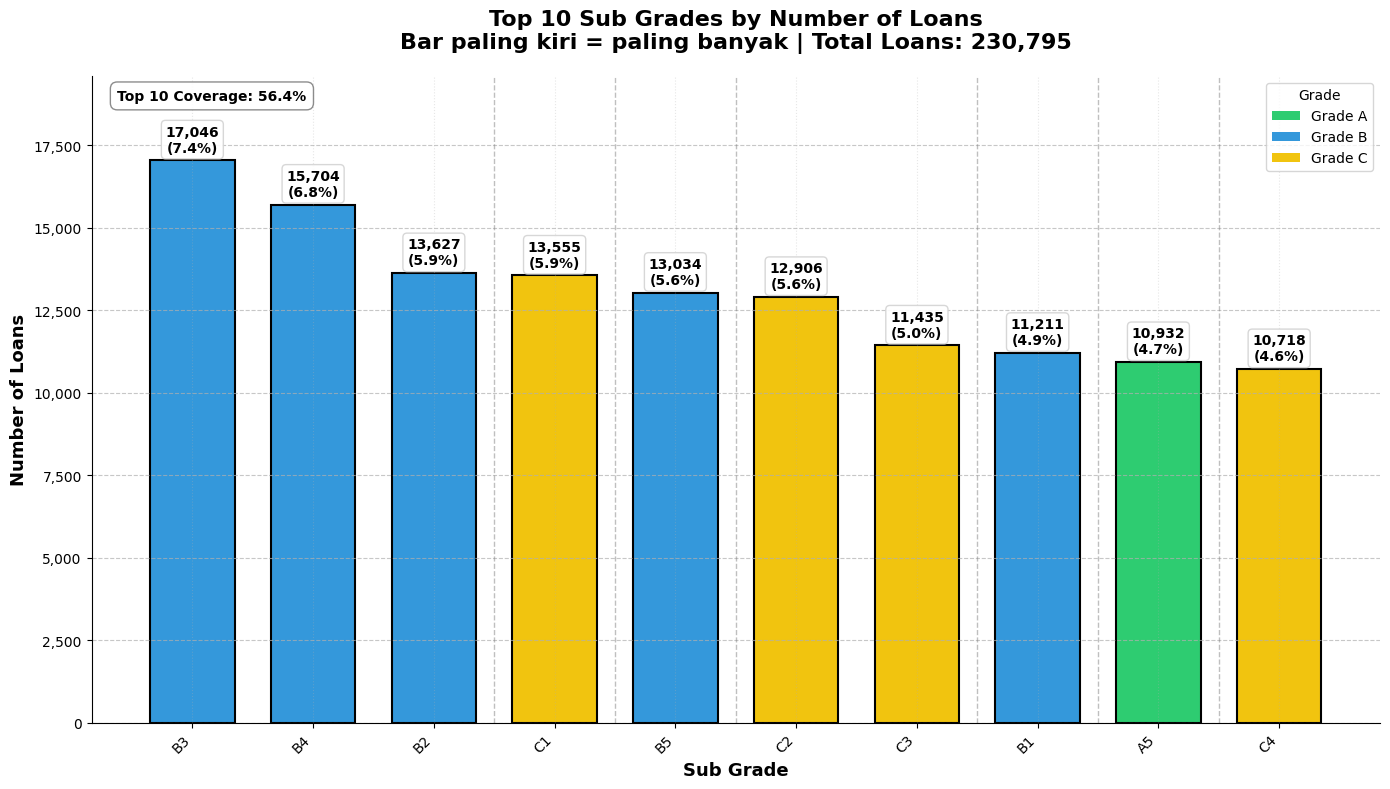

In [83]:
# Hitung count untuk setiap sub_grade dan ambil 10 terbesar
sub_grade_counts = df['sub_grade'].value_counts()
top_10_subgrades = sub_grade_counts.head(10)  # Ambil 10 teratas

total_count = len(df)

# Hitung persentase terhadap total
percentages = (top_10_subgrades.values / total_count * 100)

# Buat DataFrame untuk plotting - URUTKAN DARI BESAR KE KECIL untuk vertical bar
top_subgrades_df = top_10_subgrades.reset_index()
top_subgrades_df.columns = ['sub_grade', 'count']
top_subgrades_df['percentage'] = percentages
top_subgrades_df['grade'] = top_subgrades_df['sub_grade'].str[0]

# Urutkan dari besar ke kecil untuk vertical bar (paling kiri = paling besar)
top_subgrades_df = top_subgrades_df.sort_values('count', ascending=False).reset_index(drop=True)

# Warna berdasarkan grade
grade_colors = {
    'A': '#2ECC71',  # Hijau
    'B': '#3498DB',  # Biru
    'C': '#F1C40F',  # Kuning
    'D': '#E67E22',  # Oranye
    'E': '#E74C3C',  # Merah muda
    'F': '#C0392B',  # Merah
    'G': '#7D3C98'   # Ungu
}

# Buat plot VERTICAL BAR
plt.figure(figsize=(14, 8))

# Buat vertical bar chart dengan bar paling kiri paling panjang
bars = plt.bar(range(len(top_subgrades_df)), 
               top_subgrades_df['count'],
               color=[grade_colors.get(g, '#95A5A6') for g in top_subgrades_df['grade']],
               edgecolor='black',
               linewidth=1.5,
               width=0.7)

# Tambahkan nilai count di atas setiap bar
for i, (count, pct) in enumerate(zip(top_subgrades_df['count'], top_subgrades_df['percentage'])):
    # Format teks
    label_text = f'{count:,}\n({pct:.1f}%)'
    
    # Posisi teks: di atas bar
    plt.text(i, 
             count + (max(top_subgrades_df['count']) * 0.01), 
             label_text,
             ha='center', 
             va='bottom',
             fontsize=10,
             fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                      edgecolor='lightgray', pad=0.3))

# Atur label sumbu
plt.xlabel('Sub Grade', fontsize=13, fontweight='bold')
plt.ylabel('Number of Loans', fontsize=13, fontweight='bold')

# Atur x-ticks
plt.xticks(range(len(top_subgrades_df)), top_subgrades_df['sub_grade'], rotation=45, ha='right')

# Judul dengan informasi total
plt.title(f'Top 10 Sub Grades by Number of Loans\nBar paling kiri = paling banyak | Total Loans: {total_count:,}', 
          fontsize=16, fontweight='bold', pad=20)

# Format sumbu y dengan comma separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Grid untuk readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.grid(True, axis='x', linestyle=':', alpha=0.3)

# Hapus spines yang tidak perlu
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Atur limit sumbu y untuk memberikan ruang untuk label
plt.ylim(0, max(top_subgrades_df['count']) * 1.15)

# Tambahkan garis pembatas grade jika grade berubah
current_grade = None
for i, sub_grade in enumerate(top_subgrades_df['sub_grade']):
    grade = sub_grade[0]
    if grade != current_grade and current_grade is not None:
        plt.axvline(x=i-0.5, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    current_grade = grade

# Buat legend untuk grade colors
from matplotlib.patches import Patch
unique_grades = sorted(top_subgrades_df['grade'].unique())
legend_elements = [Patch(facecolor=grade_colors[g], label=f'Grade {g}') for g in unique_grades]
plt.legend(handles=legend_elements, title='Grade', loc='upper right', fontsize=10)

# Tambahkan informasi coverage di dalam plot
coverage = top_subgrades_df['count'].sum() / total_count * 100
summary_text = f'Top 10 Coverage: {coverage:.1f}%'
plt.text(0.02, 0.98, summary_text,
         transform=ax.transAxes,
         ha='left',
         va='top',
         fontsize=10,
         fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, 
                  edgecolor='gray', pad=0.5))

plt.tight_layout()
plt.show()

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            230795 non-null  Int64         
 1   term                                 230795 non-null  object        
 2   int_rate                             230795 non-null  float64       
 3   sub_grade                            230795 non-null  object        
 4   home_ownership                       230795 non-null  object        
 5   annual_inc                           230795 non-null  float64       
 6   verification_status                  230795 non-null  object        
 7   issue_d                              230795 non-null  datetime64[ns]
 8   purpose                              230795 non-null  object        
 9   addr_state                           230795 non-null  object        
 10  d

In [85]:
df.drop(columns = ["issue_d", "addr_state"], inplace = True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 48 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            230795 non-null  Int64  
 1   term                                 230795 non-null  object 
 2   int_rate                             230795 non-null  float64
 3   sub_grade                            230795 non-null  object 
 4   home_ownership                       230795 non-null  object 
 5   annual_inc                           230795 non-null  float64
 6   verification_status                  230795 non-null  object 
 7   purpose                              230795 non-null  object 
 8   dti                                  230795 non-null  float64
 9   delinq_2yrs                          230795 non-null  Int64  
 10  inq_last_6mths                       230795 non-null  Int64  
 11  mths_since_last_de

# Data Encoding

In [87]:
cat_cols_final = list(df.select_dtypes(include = "object").columns)

In [88]:
for col in cat_cols_final:
    print(f"\nColumn: {col}")
    print(df[col].unique())



Column: term
[' 36 months' ' 60 months']

Column: sub_grade
['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']

Column: home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

Column: verification_status
['Verified' 'Source Verified' 'Not Verified']

Column: purpose
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']

Column: region
['Southwest' 'Southeast' 'Midwest' 'West' 'Northeast']


In [89]:
df['term'] = df['term'].str.strip().map({
    '36 months': 0,
    '60 months': 1
})

In [90]:
subgrade_order = [
    'A1','A2','A3','A4','A5',
    'B1','B2','B3','B4','B5',
    'C1','C2','C3','C4','C5',
    'D1','D2','D3','D4','D5',
    'E1','E2','E3','E4','E5',
    'F1','F2','F3','F4','F5',
    'G1','G2','G3','G4','G5'
]

subgrade_mapping = {grade: i+1 for i, grade in enumerate(subgrade_order)}

df['sub_grade_ord'] = df['sub_grade'].map(subgrade_mapping)

In [91]:
df['home_ownership_grouped'] = df['home_ownership'].replace({
    'NONE': 'OTHER',
    'ANY': 'OTHER'
})

df = pd.get_dummies(
    df,
    columns=['home_ownership_grouped'],
    prefix='home_ownership',
    drop_first=True
)

In [92]:
verification_mapping = {
    'Not Verified': 0,
    'Source Verified': 1,
    'Verified': 2
}

df['verification_status_ord'] = df['verification_status'].map(verification_mapping)

In [93]:
rare_purpose = ['renewable_energy', 'educational', 'moving']

df['purpose_grouped'] = df['purpose'].replace(
    {p: 'other' for p in rare_purpose}
)

In [94]:
df = pd.get_dummies(
    df,
    columns=['purpose_grouped'],
    prefix='purpose',
    drop_first=True
)

In [95]:
df = pd.get_dummies(
    df,
    columns=['region'],
    prefix='region',
    drop_first=True
)

In [96]:
df.drop(
    columns=[
        'sub_grade',
        'home_ownership',
        'verification_status',
        'purpose'
    ],
    inplace=True,
    errors='ignore'
)


In [97]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [98]:
df.head()

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_months,years,mths_since_last_record_missing,mths_since_last_major_derog_missing,mths_since_last_delinq_missing,total_rev_hi_lim_missing,tot_cur_bal_missing,tot_coll_amt_missing,emp_length_num,emp_length_missing,status_bad,mths_since_last_delinq_outlier,mths_since_last_record_outlier,mths_since_last_major_derog_outlier,loan_amnt_outlier,annual_inc_outlier,revol_bal_outlier,tot_cur_bal_outlier,total_rev_hi_lim_outlier,tot_coll_amt_outlier,int_rate_outlier,dti_outlier,revol_util_outlier,sub_grade_ord,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_ord,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,region_Northeast,region_Southeast,region_Southwest,region_West
0,5000,0,10.65,10.085851,27.65,0,1,0,0,3,0,9.521422,83.7,9,0,0,0,0.0,11.308849,10.03456,327.666667,2011,1,1,1,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500,1,15.27,10.308986,1.00,0,5,0,0,3,0,7.4313,9.4,4,0,0,0,0.0,11.308849,10.03456,154.233333,2011,1,1,1,1,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,14,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2400,0,15.96,9.413526,8.72,0,2,0,0,2,0,7.991931,98.5,10,0,0,0,0.0,11.308849,10.03456,122.733333,2011,1,1,1,1,1,1,10.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,15,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,10000,0,13.49,10.803669,20.00,0,1,35,0,10,0,8.630343,21.0,37,0,0,0,0.0,11.308849,10.03456,192.733333,2011,1,1,0,1,1,1,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,5000,0,7.90,10.491302,11.20,0,3,0,0,9,0,8.982687,28.3,12,0,0,0,0.0,11.308849,10.03456,86.200000,2011,1,1,1,1,1,1,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 62 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            230795 non-null  Int64  
 1   term                                 230795 non-null  int64  
 2   int_rate                             230795 non-null  float64
 3   annual_inc                           230795 non-null  float64
 4   dti                                  230795 non-null  float64
 5   delinq_2yrs                          230795 non-null  Int64  
 6   inq_last_6mths                       230795 non-null  Int64  
 7   mths_since_last_delinq               230795 non-null  Int64  
 8   mths_since_last_record               230795 non-null  Int64  
 9   open_acc                             230795 non-null  Int64  
 10  pub_rec                              230795 non-null  Int64  
 11  revol_bal         

# Machine Learning

In [100]:
X = df.drop("status_bad", axis=1)
y = df["status_bad"]

In [101]:
# Splitting data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shape from data train and data test
print ("Shape of data train:", X_train.shape) 
print ("Shape of data test:", X_test.shape)

Shape of data train: (184636, 61)
Shape of data test: (46159, 61)


In [106]:
X_train = X_train.astype(float)

In [108]:
oversampling = SMOTE(random_state=12, sampling_strategy=1)

# Fit the over sampling
X_train_resampled, y_train_resampled = oversampling.fit_resample(X_train, y_train)

In [ ]:
y_train_resampled.value_counts()

status_bad
0    149381
1    149381
Name: count, dtype: Int64

In [110]:
X_train_resampled.shape

(298762, 61)

In [111]:
y_train_resampled.shape

(298762,)

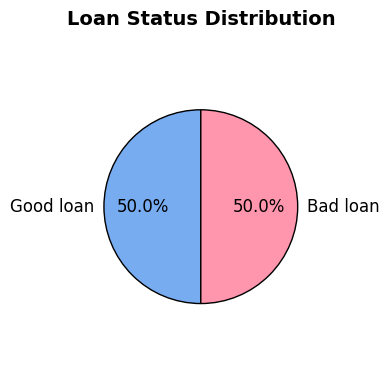

In [116]:
# Count good vs bad loans
loan_counts = y_train_resampled.value_counts()
labels = ['Good loan', 'Bad loan']
sizes = loan_counts.values
colors = ['#77ACF1', '#FF96AD']  # Green for good, red for bad

# Create donut chart
fig, ax = plt.subplots(figsize=(4, 4), facecolor='none')
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black'}
)

# Add center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='none')
fig.gca().add_artist(centre_circle)

# Title
ax.set_title('Loan Status Distribution', fontsize=14, fontweight='bold')

# Equal aspect ratio ensures the pie is circular
ax.axis('equal')

plt.tight_layout()
plt.show()


In [119]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame using original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [120]:
X_train_scaled.shape

(298762, 61)

In [121]:
X_test_scaled.shape

(46159, 61)

In [122]:
y_test.shape

(46159,)

In [123]:
len(X_test_scaled)

46159

In [127]:
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

results = []
feature_importance_results = {}

In [132]:
# Train and evaluate models
for name, clf in classifiers.items():
    print(f"Training {name}...")
    start_time = time.time()

    clf.fit(X_train_scaled, y_train_resampled)

    # Predictions
    y_pred_train = clf.predict(X_train_scaled)
    y_prob_train = clf.predict_proba(X_train_scaled)[:, 1] if hasattr(clf, "predict_proba") else None

    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None

    # Training metrics
    train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_precision = precision_score(y_train_resampled, y_pred_train)
    train_f1 = f1_score(y_train_resampled, y_pred_train)
    train_roc_auc = roc_auc_score(y_train_resampled, y_prob_train) if y_prob_train is not None else None

    # Testing metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    elapsed_time = time.time() - start_time

    # Store results
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Train Recall': train_recall,
        'Train Precision': train_precision,
        'Train F1': train_f1,
        'Train ROC AUC': train_roc_auc,
        'Test Accuracy': test_accuracy,
        'Test Recall': test_recall,
        'Test Precision': test_precision,
        'Test F1': test_f1,
        'Test ROC AUC': test_roc_auc,
        'Train Time (s)': round(elapsed_time, 2)
    })

    # Feature importance (for tree-based models)
    if hasattr(clf, 'feature_importances_'):
        feature_importance_results[name] = pd.Series(
            clf.feature_importances_, index=X.columns
        ).sort_values(ascending=False)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df


Training RandomForest...
Training LogisticRegression...
Training DecisionTree...
Training XGBoost...


c:\Prima\Github\Lending_Company_Project\venv\lib\site-packages\xgboost\training.py:199: UserWarning: [23:43:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training GradientBoosting...


,Model,Train Accuracy,Train Recall,Train Precision,Train F1,Train ROC AUC,Test Accuracy,Test Recall,Test Precision,Test F1,Test ROC AUC,Train Time (s)
0,RandomForest,0.999993,0.999987,1.000000,0.999993,1.000000,0.808748,0.063089,0.493345,0.111871,0.701093,166.86
1,LogisticRegression,0.658397,0.662467,0.657118,0.659782,0.716894,0.654390,0.654715,0.308887,0.419743,0.711077,5.54
2,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,0.706319,0.296721,0.262208,0.278399,0.549849,20.86
3,XGBoost,0.890421,0.793836,0.983895,0.878706,0.947321,0.809766,0.093044,0.509950,0.157375,0.716495,8.26
4,GradientBoosting,0.880025,0.773559,0.982836,0.865730,0.930438,0.809225,0.059117,0.503382,0.105808,0.707978,295.51


In [135]:
model = LogisticRegression()

# Fit the model
model.fit(X_train_scaled, y_train_resampled)

# Predict labels and probabilities
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.65      0.75     37346
         1.0       0.31      0.65      0.42      8813

    accuracy                           0.65     46159
   macro avg       0.60      0.65      0.59     46159
weighted avg       0.78      0.65      0.69     46159

Confusion Matrix:
[[24436 12910]
 [ 3043  5770]]
ROC AUC Score: 0.7110765080642926


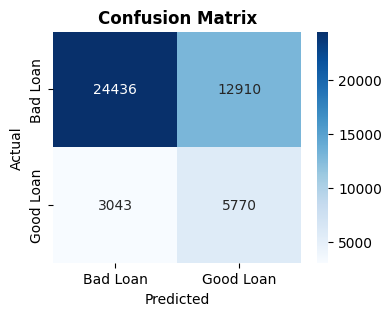

Text(0, 0.5, 'True Positive Rate')

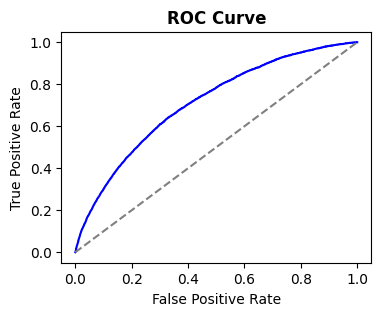

In [136]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad Loan", "Good Loan"], yticklabels=["Bad Loan", "Good Loan"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontweight='bold')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve', fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')